# **Risk Rating (Bank Field)** 🏦💴

| Field         | Description                                      |
|---------------|--------------------------------------------------|
| contractcode  | Unique identifier for each contract.            |
| income        | Monthly income of the individual.                |
| tenor         | Loan tenure in months.                           |
| dependents    | Number of dependents.                            |
| midoverdue    | Mid-term overdue amount in dollars.              |
| riskrating    | Risk rating (categorical or ordinal variable).   |
| age           | Age of the individual.                           |
| empyear       | Years of employment.                             |
| asset         | Total assets.                                    |
| debt          | Total debt.                                      |

In [467]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [468]:
df = pd.read_csv('dataset\Riskrating.csv')

<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:1: SyntaxWarning: invalid escape sequence '\R'
C:\Users\Acer\AppData\Local\Temp\ipykernel_11256\1512743427.py:1: SyntaxWarning: invalid escape sequence '\R'
  df = pd.read_csv('dataset\Riskrating.csv')


In [469]:
df.head()

,contractcode,income,tenor,dependents,midoverdue,riskrating,age,empyear,asset,debt
0,AGR-000001,295,48,5,76,4,55,12,892.926628,4.698371
1,AGR-000011,271,36,5,76,4,53,10,905.822473,4.063852
2,AGR-000030,159,12,0,0,1,35,5,551.726091,0.050000
3,AGR-000043,210,12,3,53,3,45,7,791.112405,0.721384
4,AGR-000049,165,36,0,38,2,36,5,592.650130,0.066667


In [470]:
df.shape 

(900, 10)

In [471]:
df['riskrating'].value_counts()

riskrating
3    291
1    227
2    159
4    120
5    103
Name: count, dtype: int64

In [472]:
def sampling(df, col, ratio=0.6):
    classes = np.unique(df[col])
    indices = []
    for cls in classes:
        index = df[df[col] == cls].index.tolist()
        count = int(len(index) * ratio)
        np.random.shuffle(index)
        indices.append(index[:count])
    return indices

indices = sampling(df, 'riskrating')

In [473]:
indices = [index for index_list in indices for index in index_list]
df_clean = df.copy()
df_clean = df_clean.iloc[indices].reset_index(drop=True)

In [474]:
df_clean.shape 

(538, 10)

In [475]:
df_clean['riskrating'].value_counts()

riskrating
3    174
1    136
2     95
4     72
5     61
Name: count, dtype: int64

## **Univariate Analysis**

In [476]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538 entries, 0 to 537
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   contractcode  538 non-null    object 
 1   income        538 non-null    int64  
 2   tenor         538 non-null    int64  
 3   dependents    538 non-null    int64  
 4   midoverdue    538 non-null    int64  
 5   riskrating    538 non-null    int64  
 6   age           538 non-null    int64  
 7   empyear       538 non-null    int64  
 8   asset         538 non-null    float64
 9   debt          538 non-null    float64
dtypes: float64(2), int64(7), object(1)
memory usage: 42.2+ KB


In [477]:
df_clean[['riskrating', 'midoverdue']] = df_clean[['riskrating', 'midoverdue']].astype('object')
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538 entries, 0 to 537
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   contractcode  538 non-null    object 
 1   income        538 non-null    int64  
 2   tenor         538 non-null    int64  
 3   dependents    538 non-null    int64  
 4   midoverdue    538 non-null    object 
 5   riskrating    538 non-null    object 
 6   age           538 non-null    int64  
 7   empyear       538 non-null    int64  
 8   asset         538 non-null    float64
 9   debt          538 non-null    float64
dtypes: float64(2), int64(5), object(3)
memory usage: 42.2+ KB


all of them are numeric except for `contractcode`

In [478]:
numeric_desc = df_clean.describe().T
numeric_desc['nunique'] = [df_clean[col].nunique() for col in df_clean.select_dtypes(include='number').columns]
numeric_desc

,count,mean,std,min,25%,50%,75%,max,nunique
income,538.0,162.998141,51.172782,70.000000,120.250000,163.000000,199.000000,299.000000,184
tenor,538.0,29.776952,13.446995,12.000000,12.000000,24.000000,36.000000,48.000000,4
dependents,538.0,2.998141,1.982699,0.000000,1.000000,3.000000,5.000000,6.000000,7
age,538.0,35.842007,8.250678,20.000000,29.000000,36.000000,42.000000,61.000000,41
empyear,538.0,5.148699,2.614992,0.000000,3.000000,5.000000,7.000000,13.000000,14
asset,538.0,570.968824,177.509378,236.159844,437.226971,552.728768,696.063190,1192.290043,538
debt,538.0,3.828912,4.455928,0.050000,0.668331,2.198631,5.355931,22.113310,465


- tenor: low unique val -> maybe those months are based like standarization 
- dependents: 6 max, it could be their fam, relative or etc that are dependent with them    
- midoverdue: in usd, how much loan that hasn't been cover  
- riskrating (target): ranging 1-5 (low-high risk)

In [479]:
df_clean.describe(include='object').T

,count,unique,top,freq
contractcode,538,538,AGR-009037,1
midoverdue,538,6,53,174
riskrating,538,5,3,174


all of the contractcode is unique, let's drop this, because it won't effect overall EDA

## **Data Inconsistencies**

In [480]:
df_clean = df_clean.drop('contractcode', axis=1)

In [481]:
df_clean.isna().sum()

income        0
tenor         0
dependents    0
midoverdue    0
riskrating    0
age           0
empyear       0
asset         0
debt          0
dtype: int64

In [482]:
df_clean.duplicated().sum()

0

great no duplicates and null values

In [483]:
plt.rcParams['figure.figsize'] = (15, 10)

In [484]:
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['figure.titlesize'] = (20)
plt.rcParams['figure.titleweight'] = 'bold'

In [485]:
numeric_data = df_clean.select_dtypes(include='number')
categorical_data = df_clean.select_dtypes(include='object')

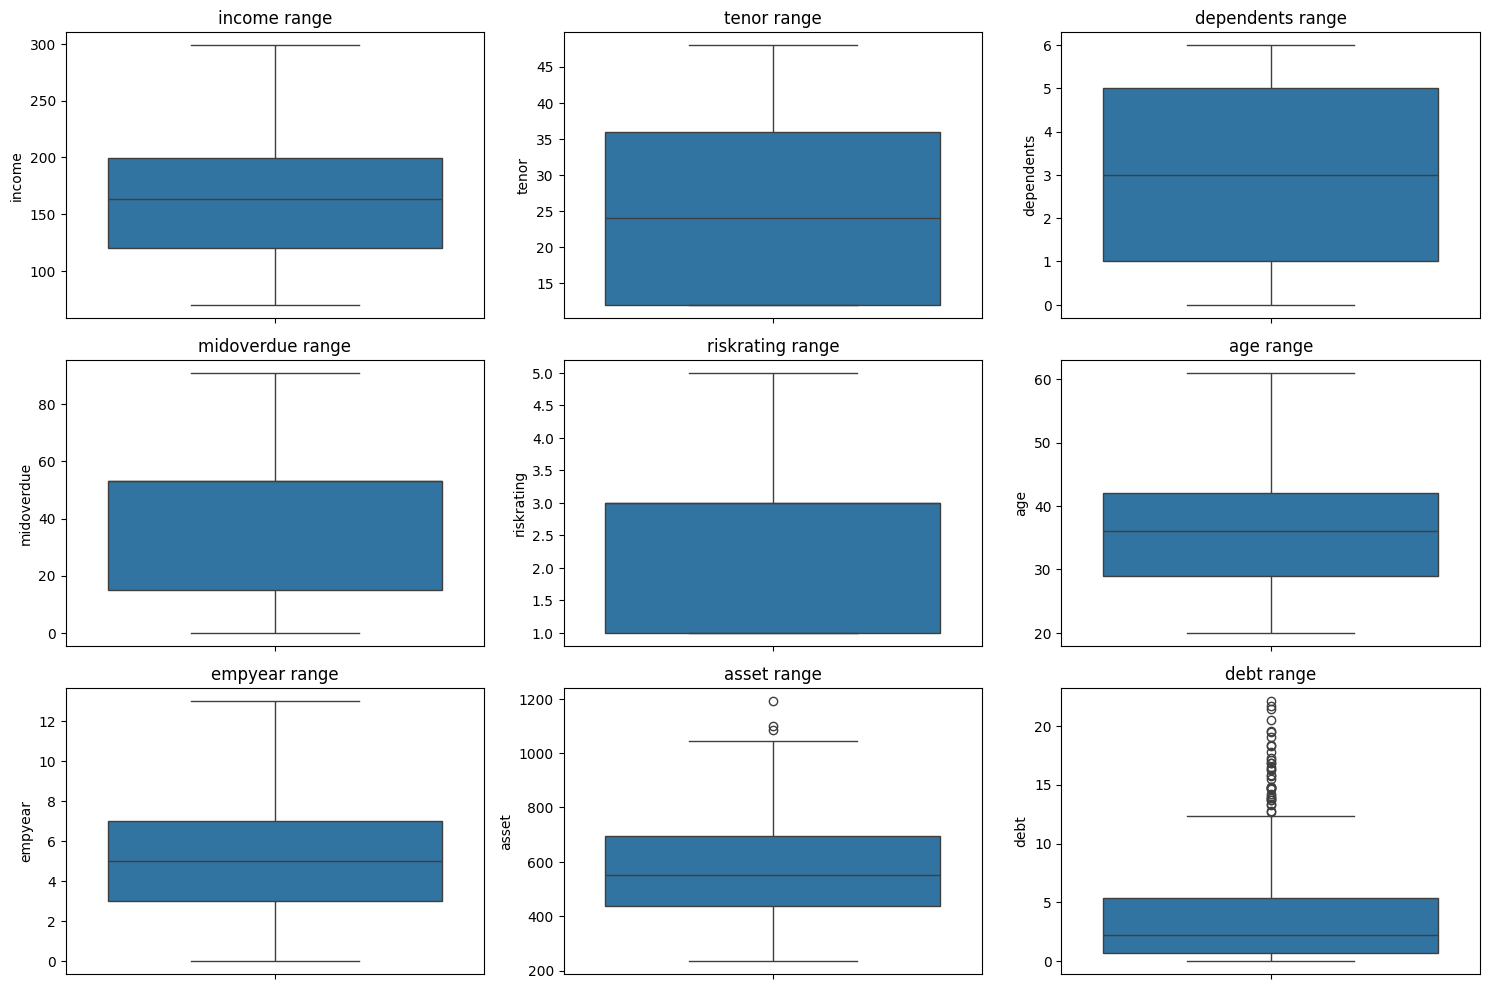

In [486]:
for i, col in enumerate(df_clean.columns):
    plt.subplot(3, 3, i+1)
    plt.title(f'{col} range')
    sns.boxplot(df_clean[col])
plt.tight_layout()
plt.show()

since asset has huge magnitude, some outliers appears, while `debt`, has more outliers than i thought

`"Hypotheses"`: those people who have `higher` debt than the rest, is risky to be borrowed money

In [487]:
def zscore(data):
    z = (data - data.mean()) / data.std()
    outliers = z[(z < -3) | (z > 3)]
    return outliers

for col in df_clean.columns:
    outliers = zscore(df_clean[col])
    print(f'{len(outliers)} in {col}')

0 in income
0 in tenor
0 in dependents
0 in midoverdue
0 in riskrating
1 in age
1 in empyear
1 in asset
11 in debt


were going to handle the extreme outliers only with zscores, so it won't effect the spliting

In [488]:
for col in df_clean.columns:
    outliers = zscore(df_clean[col])
    indices = outliers.index.tolist()
    df_clean.loc[indices, col] = df_clean[col].median()
    outliers = zscore(df_clean[col])
    print(f'After {len(outliers)} in {col}')

After 0 in income
After 0 in tenor
After 0 in dependents
After 0 in midoverdue
After 0 in riskrating
After 0 in age
After 0 in empyear
After 1 in asset
After 9 in debt


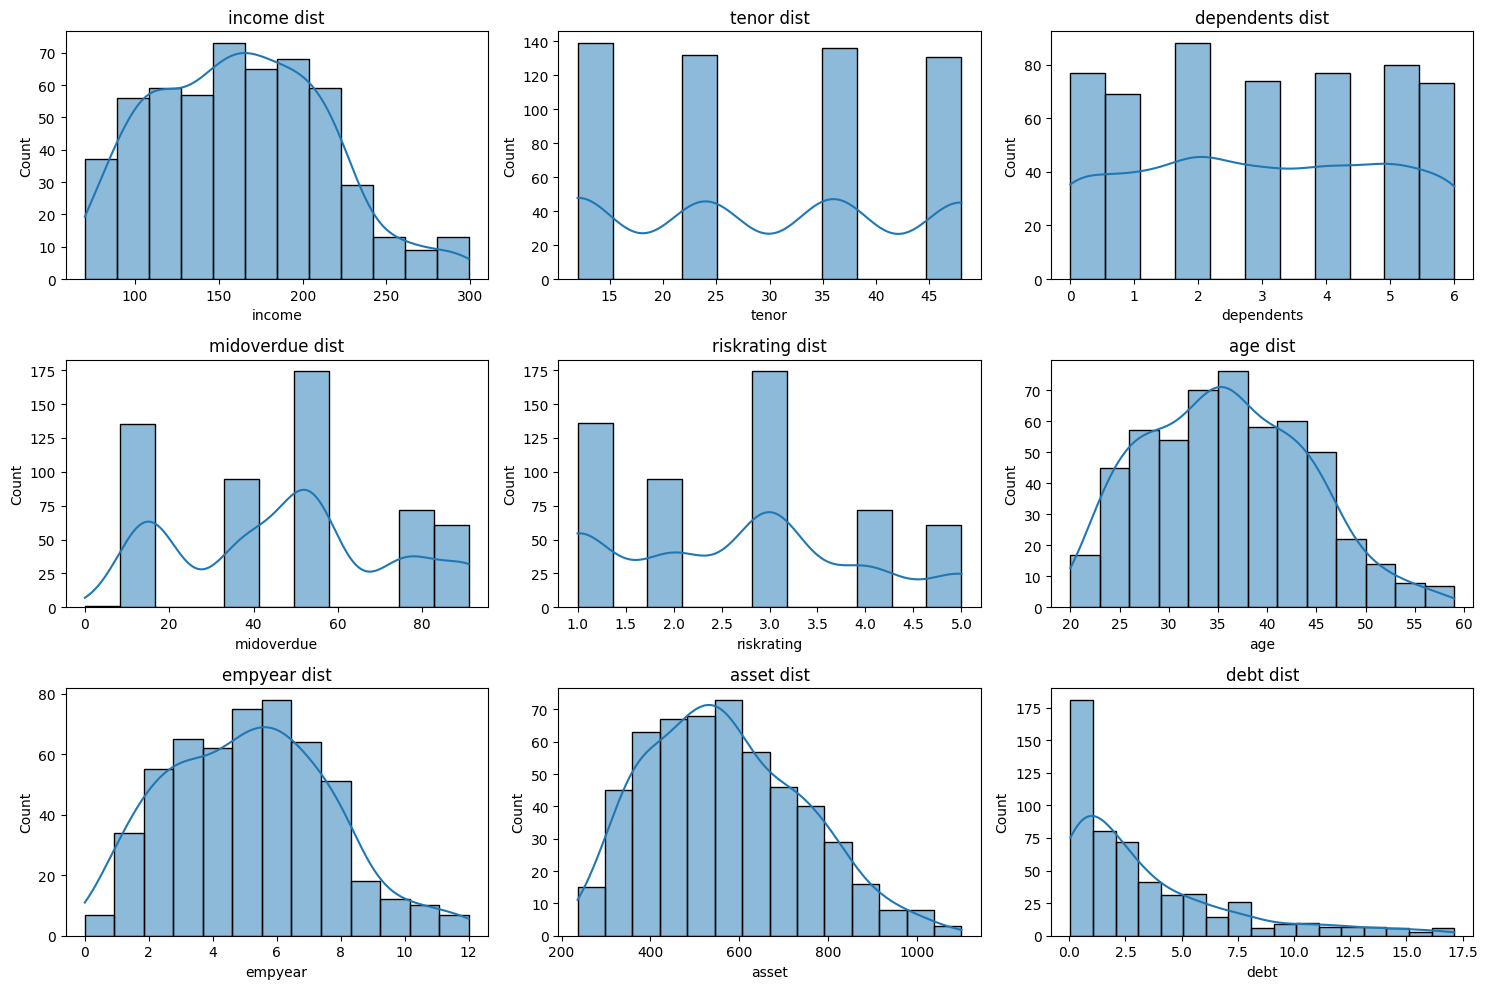

In [489]:
for i, col in enumerate(df_clean.columns):
    plt.subplot(3, 3, i+1)
    plt.title(f'{col} dist')
    sns.histplot(df_clean[col], kde=True)
plt.tight_layout()
plt.show()

## **Bivariate Analysis**

## Early Hypotheses

| Early Hipotesa         | Reason                                      |
|---------------|--------------------------------------------------|
| Older People has more dependet, income and assets  | have more experience             |
| Lower assets or Income more risk        | longer time to return the money               |
| Have correlation to income and assets         | Some of people might buy more assets to inverst theoir money                        |
| Huge Debt / mideoverdue more risk    | if client to many borrow money with high overdue, it will risk                           |
| High depent more risk    | Client have a more responsibilites to handle              |


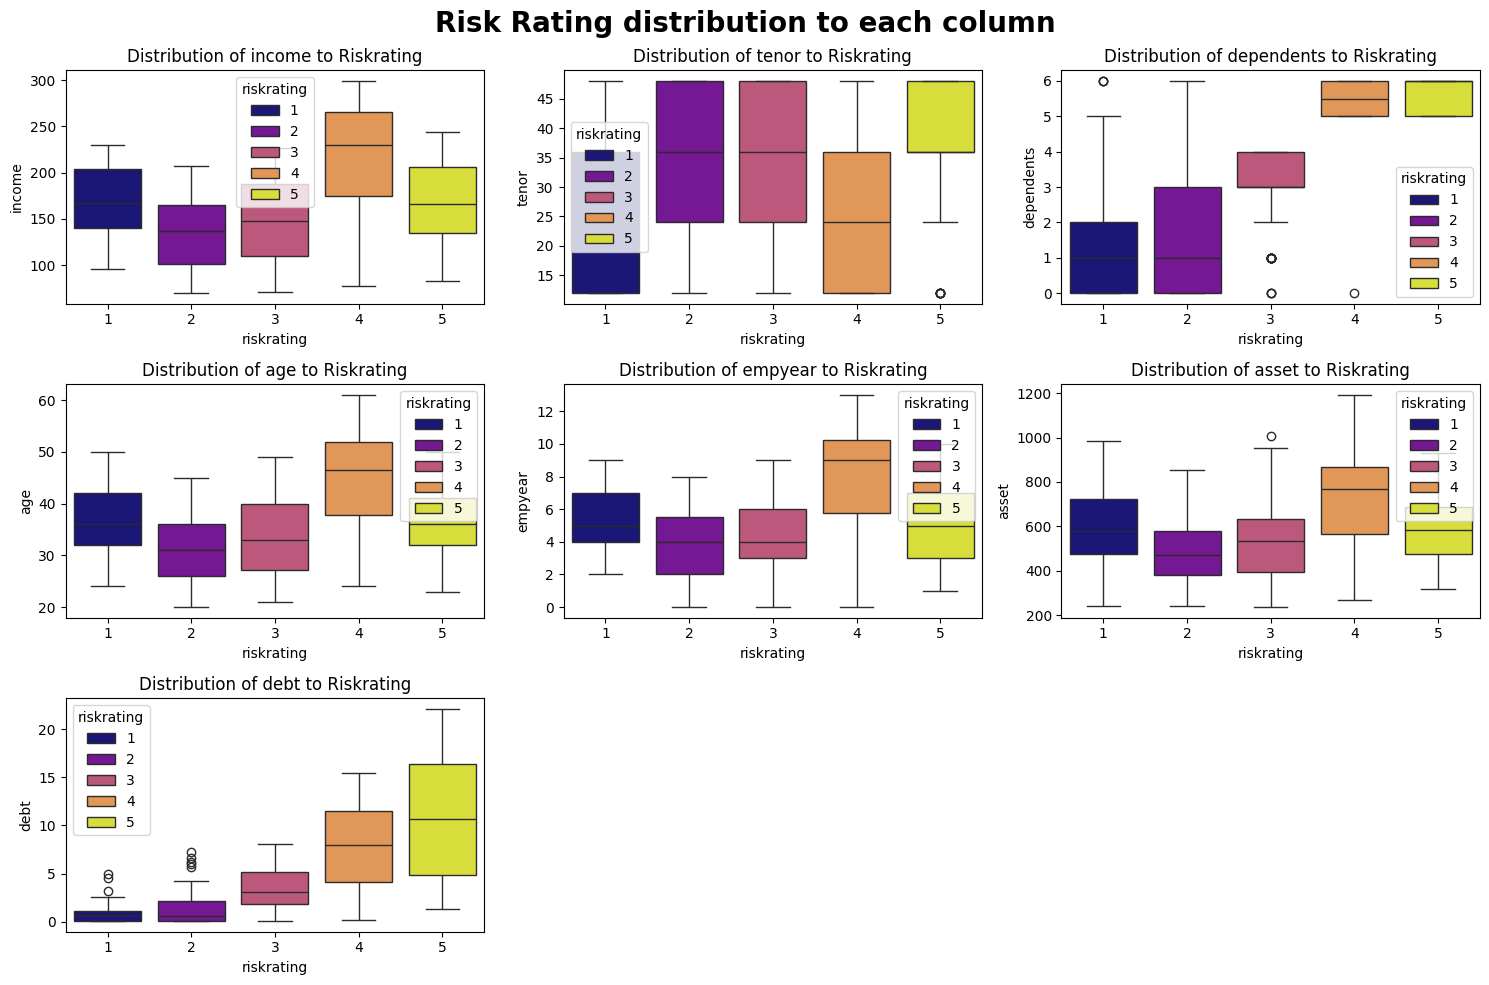

In [490]:
for i, col in enumerate(numeric_data):
    plt.subplot(3, 3, i+1)
    sns.boxplot(numeric_data, x=df_clean['riskrating'], y=col, hue=df_clean['riskrating'], palette='plasma')
    plt.title(f'Distribution of {col} to Riskrating')

plt.suptitle("Risk Rating distribution to each column")
plt.tight_layout()
plt.show()


### 1. Older People has more dependet, income and assets

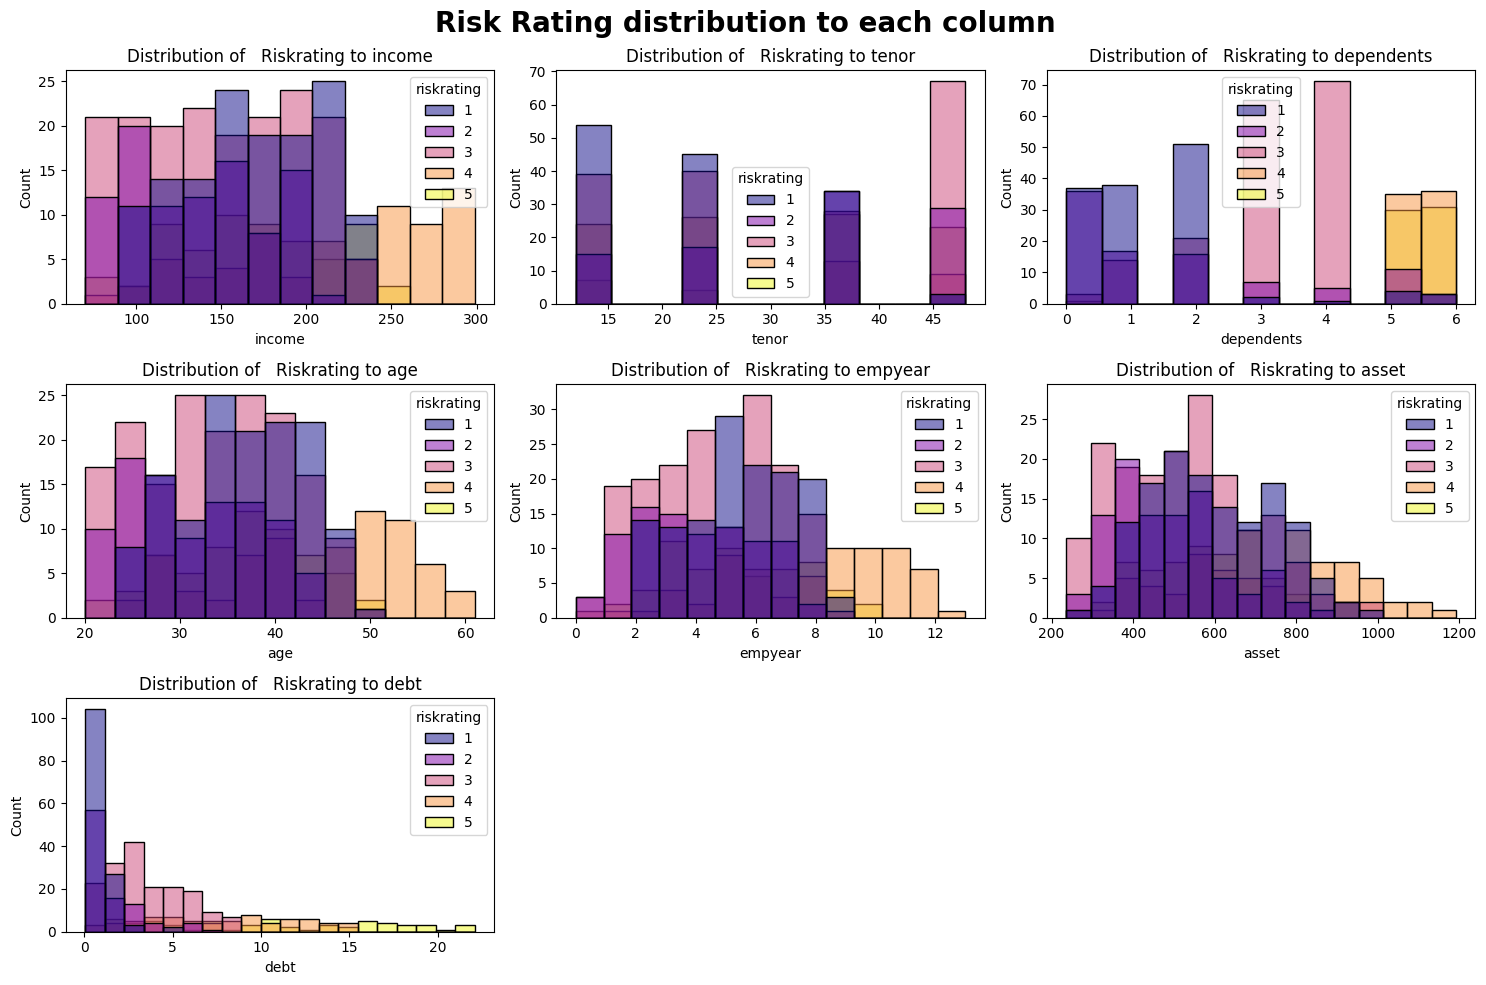

In [491]:
for i, col in enumerate(numeric_data):
    plt.subplot(3, 3, i+1)
    sns.histplot(numeric_data, x=col, hue=df_clean['riskrating'], palette='plasma')
    plt.title(f'Distribution of   Riskrating to {col}')

plt.suptitle("Risk Rating distribution to each column")
plt.tight_layout()
plt.show()


In [492]:
df_clean['midoverdue']

0      15
1      15
2      15
3      15
4      15
       ..
533    91
534    91
535    91
536    91
537    91
Name: midoverdue, Length: 538, dtype: object

<Axes: xlabel='riskrating', ylabel='midoverdue'>

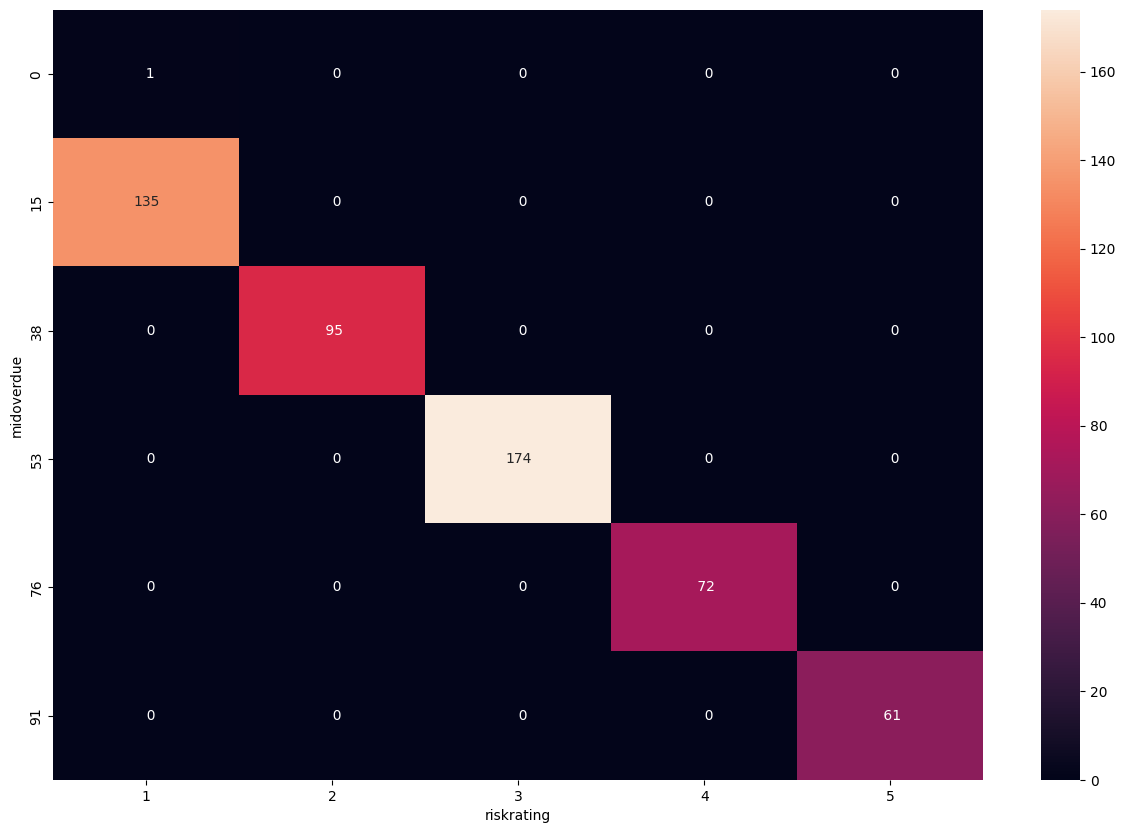

In [493]:
sns.heatmap(pd.crosstab(df_clean['midoverdue'], df_clean['riskrating']), annot=True, fmt="3")

## Hypotheses vs The Fact

| Early Hipotesa         | Result                                      |
|---------------|--------------------------------------------------|
| Older People has more dependet, income and assets  | Yes for only dependentm while income and assets hove more in 'prime age' range 50 and above 30          |
| Lower assets or Income more risk        |  assets and income correleted with age prime age            |
| Have correlation to income and assets         | Some of people might buy more assets to inverst theoir money                        |
| Huge Debt / mideoverdue more risk    | Yes eXACT                         |
| High depentt more risk    | Yes and exact            |


## Conclusions & Key Insight
- While not significant correleted, but the more `Income`, `Age`, `Assets`, `dependents` and `debt`, the more risk
- that makes unique low riskrating there in mean of data sepcific in age, the range is around from below 50 and above 30
- but specific in debt, more debt in out of this bank, the more risk

Conculsion: stable income and low riskrating is dominated in around from below 50 and above 30, that effect to  `Income`, `Age`, `Assets`,  but with low `debt` and `dependent`

## **Feature Encoding and Re Ordering**

In [494]:
def encoding(df, cols):
    for col in cols:
        df[col] = df[col].astype('category').cat.codes 
        df[col] = df[col] + 1
    return df 

obj_cols = df_clean.select_dtypes(include='object').columns 
df_clean = encoding(df_clean, obj_cols)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538 entries, 0 to 537
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   income      538 non-null    int64  
 1   tenor       538 non-null    int64  
 2   dependents  538 non-null    int64  
 3   midoverdue  538 non-null    int8   
 4   riskrating  538 non-null    int8   
 5   age         538 non-null    int64  
 6   empyear     538 non-null    int64  
 7   asset       538 non-null    float64
 8   debt        538 non-null    float64
dtypes: float64(2), int64(5), int8(2)
memory usage: 30.6 KB


In [495]:
riskrating = df_clean['riskrating'].values 
df_clean = df_clean.drop('riskrating', axis=1)
df_clean['riskrating'] = riskrating
df_clean['riskrating'].unique()

array([1, 2, 3, 4, 5], dtype=int8)

## **Multivariate Analysis**

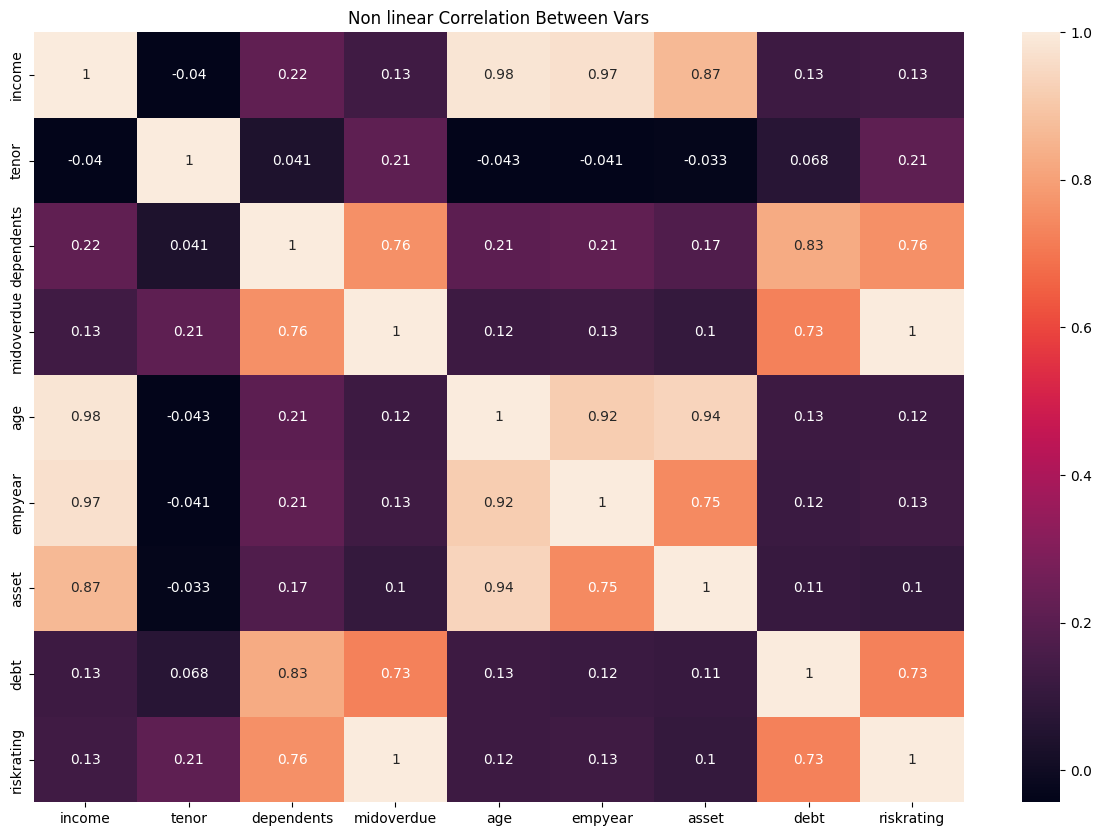

In [496]:
plt.title('Non linear Correlation Between Vars')
sns.heatmap(df_clean.corr(method='spearman'), annot=True)
plt.show()

risk rating has a `perfect` corr with midoverdue, `high` corr with dependents

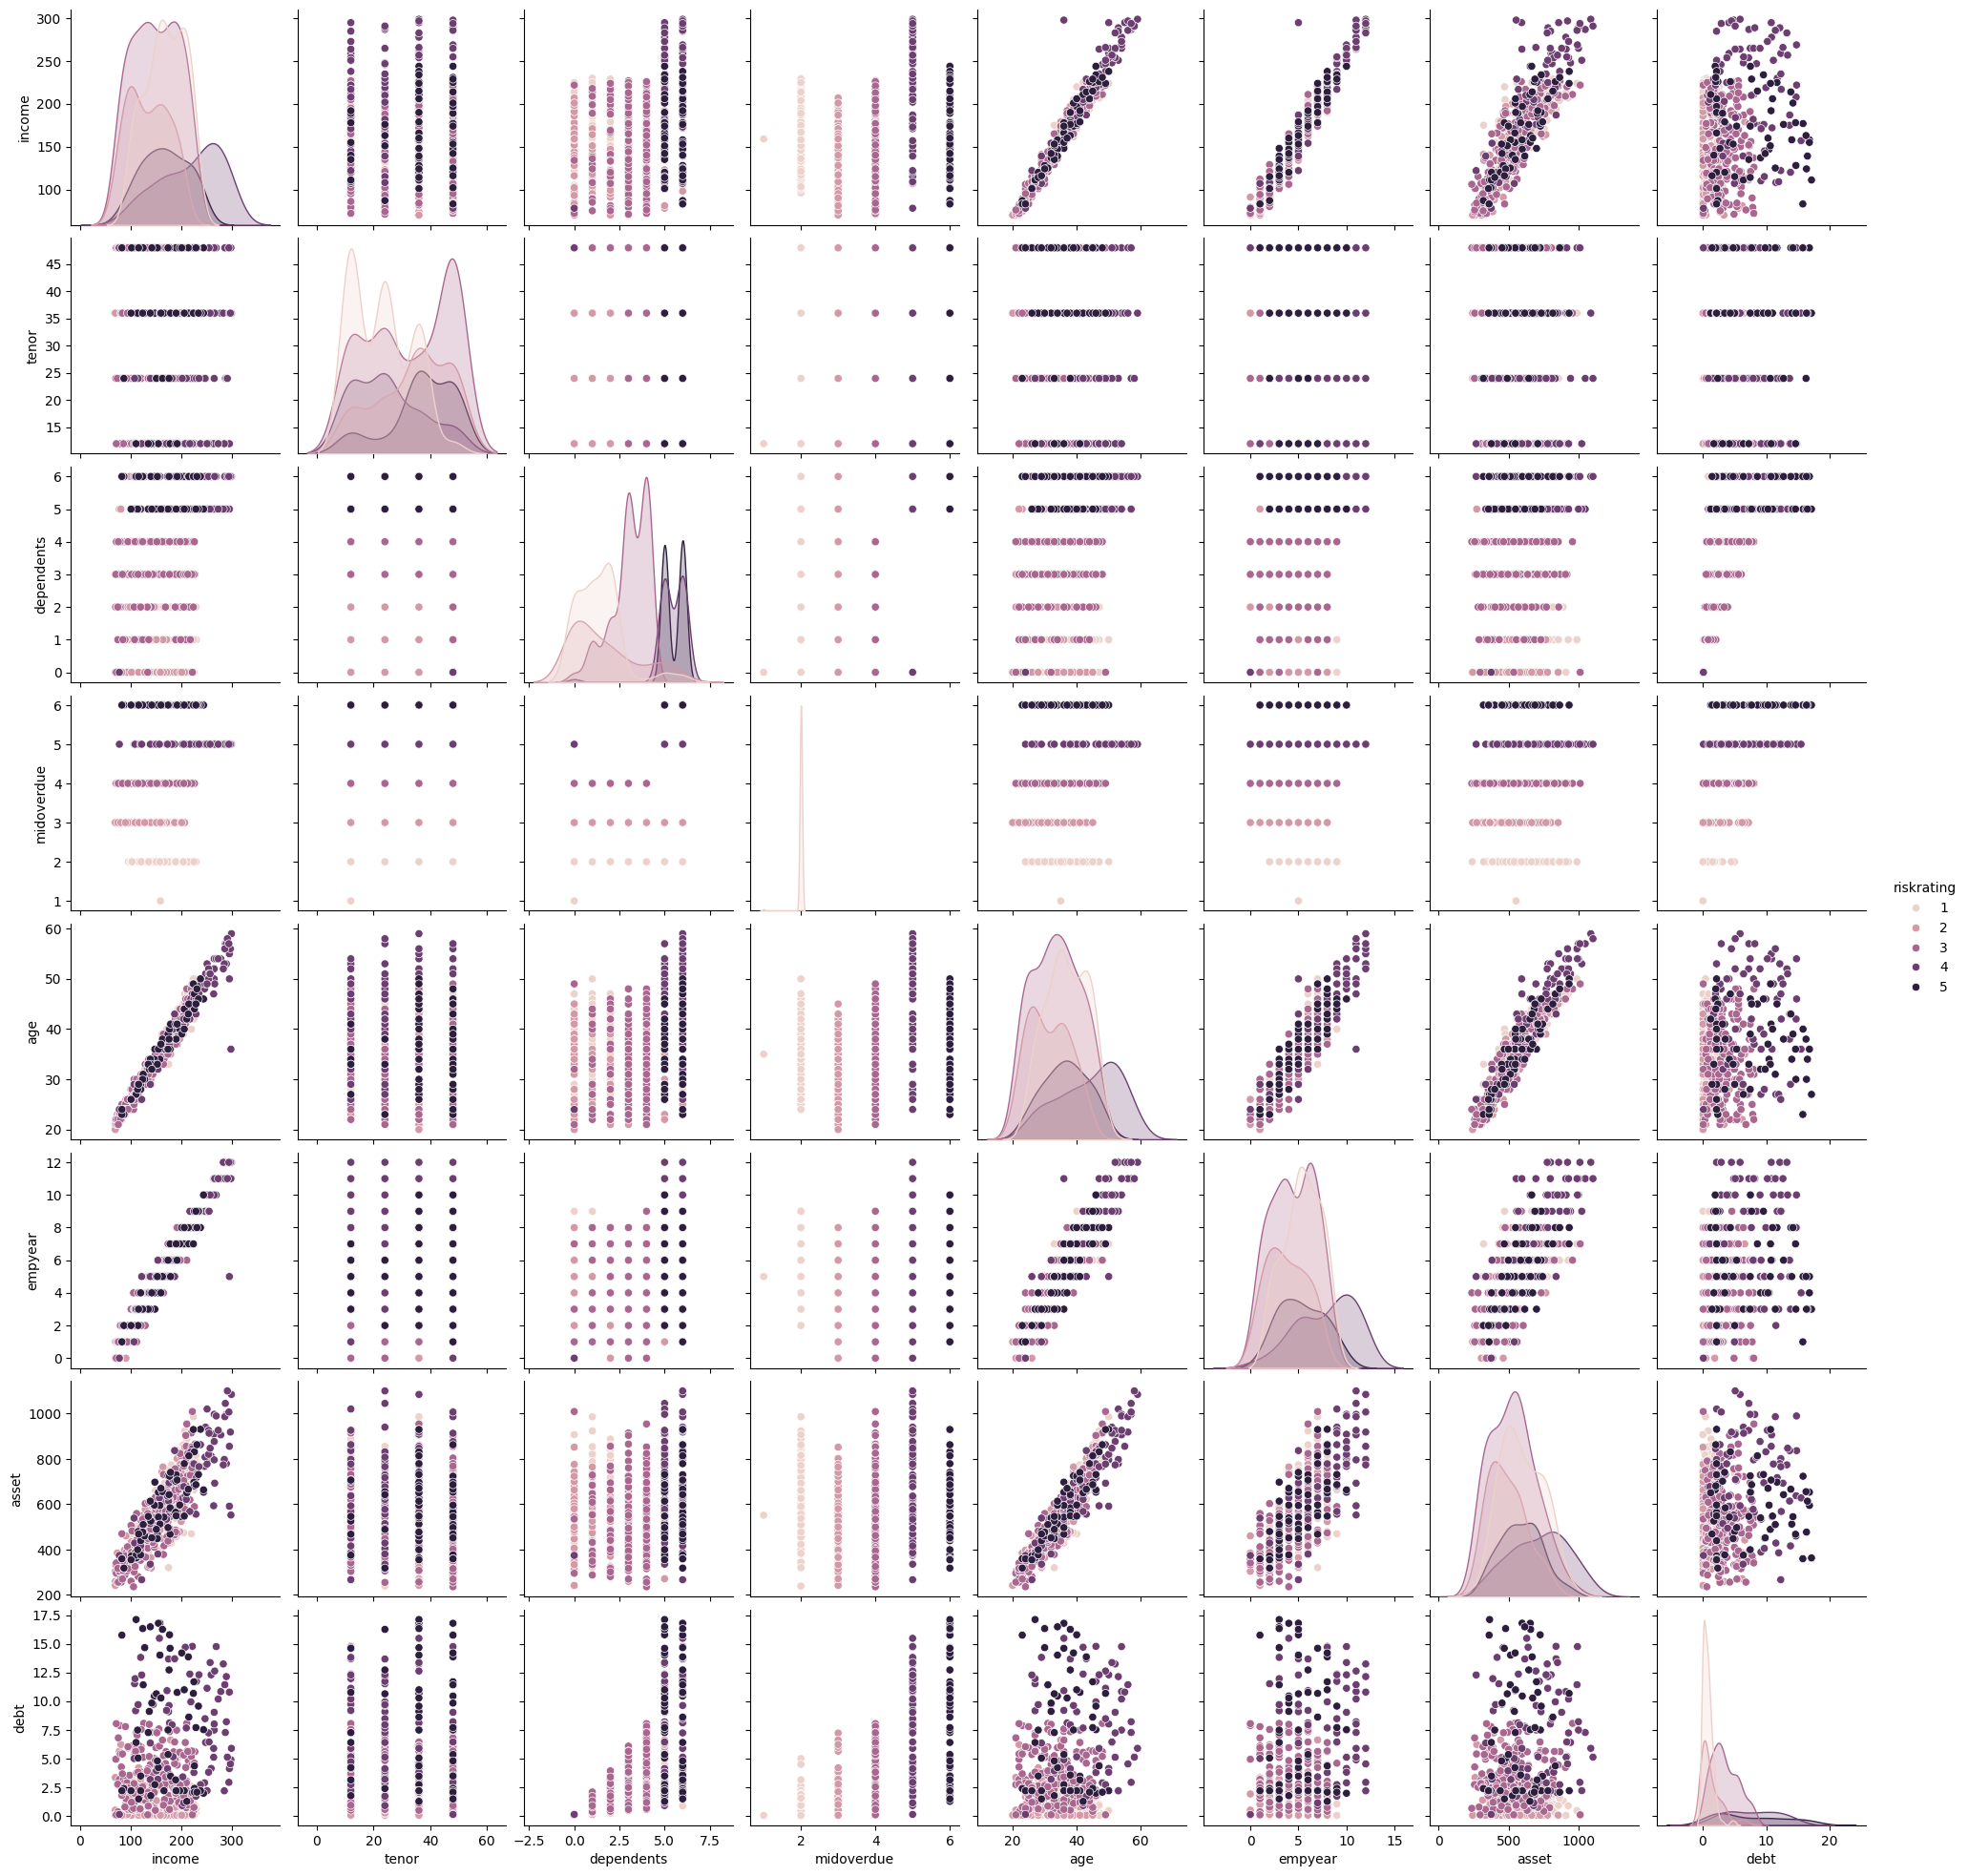

In [497]:
sns.pairplot(df_clean, hue='riskrating')
plt.show()

## **Feature Selection**

In [498]:
bins = int(np.log(len(df_clean)) +1)
print(f'Groups we can seperate based on length: {bins}')

Groups we can seperate based on length: 7


In [499]:
def mutual_information(crosstab):
    observed = np.array(crosstab.iloc[:-1, :-1])
    ratio = observed / np.sum(observed)
    Px = np.sum(ratio, axis=1, keepdims=True)
    Py = np.sum(ratio, axis=0, keepdims=True)
    nonzero = ratio > 0
    MI = np.sum(ratio[nonzero] * np.log(ratio[nonzero] / (Px @ Py)[nonzero]))
    return MI 

for col in df_clean.columns:
    X = np.array(df_clean[col])
    X = np.digitize(X, bins=np.linspace(X.min(), X.max(), bins))
    X = pd.DataFrame(X.T)
    crosstab = pd.crosstab(X[0], df_clean['riskrating'])
    MI = mutual_information(crosstab)
    print(f'{col}: {MI}')

income: 0.17446518375304804
tenor: 0.025854452990486877
dependents: 0.5331734143773987
midoverdue: 1.3324327345054514
age: 0.1663178101809213
empyear: 0.1682336408662769
asset: 0.10628549055221737
debt: 0.31443359482571775
riskrating: 1.3324327345054514


## **Cross Validation**

`midoverdue` has the highest corr with `riskrating` followed be `dependents` possible in best splitting

In [500]:
def accuracy_score(y_test, y_pred):
    return np.mean(y_test == y_pred) * 100

def cross_validation(X, y, model, k=5, prune=False, alpha=0.01):
    n_samples = len(X)
    indices = np.arange(n_samples)
    np.random.shuffle(indices)

    fold_size = n_samples // k
    accuracies = []

    for i in range(k):
        test_start = i * fold_size
        test_end = test_start + fold_size if i < k -1 else n_samples
        test_indices = indices[test_start:test_end]
        train_indices = np.concatenate([indices[:test_start], indices[test_end:]])

        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]

        model.fit(X_train, y_train.reshape(-1, 1))
        if prune == 'CCP':
            model.cost_complexity_pruning(alpha, model.root)
        elif prune == 'REP':
            model.reduced_error_pruning(X_test, y_test, model.root)
            
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    data = {
        "X_train": X_train, "X_test": X_test, "y_train": y_train, "y_test": y_test, 
        'y_pred': y_pred, 'accuracies': accuracies
    }

    return data 


<div style="background-color:red; color:white; padding:30px; font-size:30px; text-align:center; font-family:'Poppins'"> 
    2 | Modelling (Decision Tree)
</dib>

In [501]:
from collections import Counter

In [502]:
class Node:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None, sample=None):
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left 
        self.right = right
        self.info_gain = info_gain
        self.value = value 
        self.sample = sample 

In [558]:
class DecisionTreeClassifier:
    def __init__(self, max_depth=3, min_sample_split=2, min_sample_leaf=1, features=None, mode='gini'):
        self.max_depth = max_depth
        self.min_sample_split = min_sample_split
        self.min_sample_leaf = min_sample_leaf
        self.features = features
        self.mode = mode 

        self.root = None
        self.feature_importance = None 

    def build_tree(self, dataset, curr_depth=0):
        X, Y = dataset[:, :-1], dataset[:, -1]
        n_samples, n_features = X.shape 

        features = np.arange(n_features)
        if self.features != None:
            features = self.features

        if n_samples>=self.min_sample_split and curr_depth<=self.max_depth:
            best_split = self.get_best_split(dataset, n_samples, features)

            if best_split['info_gain']>0 and len(best_split['dataset_left'])>0 and len(best_split['dataset_right'])>0:
                feature_index = best_split['feature_index']

                self.feature_importance[0][feature_index] += best_split['info_gain']
                self.feature_importance[1][feature_index] += 1

                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                return Node(
                    feature_index=feature_index,
                    threshold=best_split['threshold'],
                    left = left_subtree,
                    right = right_subtree, 
                    info_gain= best_split['info_gain'],
                    sample = Y
                )
            
        leaf_value = self.calc_leaf_value(Y)
        return Node(value=leaf_value, sample=Y)
    
    def get_best_split(self, dataset, n_samples, features):
        best_split = {}
        max_info_gain = -float('inf')

        for feature_index in features:
            possible_thresholds = np.unique(dataset[:, feature_index])
            for threshold in possible_thresholds:
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)

                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]

                    curr_info_gain = self.information_gain(y, left_y, right_y, self.mode)

                    if curr_info_gain > max_info_gain:
                        best_split = {
                            'feature_index':feature_index,
                            'threshold': threshold,
                            'dataset_left': dataset_left,
                            'dataset_right': dataset_right,
                            'info_gain': curr_info_gain
                        }
                        max_info_gain = curr_info_gain
        return best_split
    
    def split(self, dataset, feature_index, threshold):
        dataset_left = np.array([row for row in dataset if row[feature_index] <= threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index] > threshold])
        return dataset_left, dataset_right
    
    def calc_leaf_value(self, Y):
        Y = list(Y)
        return max(Y, key=Y.count)
    
    


    """INFORMATION GAIN"""
    def information_gain(self, parent, l_child, r_child, mode):
        l_weight = len(l_child) / len(parent)
        r_weight = len(r_child) / len(parent)
        if mode == 'gini':
            gain = self.gini(parent) - (l_weight*self.gini(l_child) + r_weight*self.gini(r_child))
        else:
            gain = self.entropy(parent) - (l_weight*self.entropy(l_child) + r_weight*self.entropy(r_child))
        return gain

    def entropy(self, y):
        classes = np.unique(y)
        entropy = 0
        for cls in classes:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log(p_cls)
        return entropy
    
    def gini(self, y):
        classes = np.unique(y)
        gini = 0
        for cls in classes:
            p_cls = len(y[y == cls]) / len(y)
            gini += p_cls ** 2
        return 1 - gini
    



    """POST PRUNING"""
    def reduced_error_pruning(self, X_test, y_test, tree=None):
        if tree.left and tree.right:
            self.reduced_error_pruning(X_test, y_test, tree.left)
            self.reduced_error_pruning(X_test, y_test, tree.right)

            if tree.left.value is not None and tree.right.value is not None:
                accuracy_before = np.mean(self.predict(X_test) == y_test)
                tree.value = self.calc_leaf_value(y_test)
                accuracy_pruned = np.mean(self.predict(X_test) == y_test)

                if accuracy_pruned >= accuracy_before:
                    tree.left = None 
                    tree.right = None
                else:
                    tree.value = None 

    def cost_complexity_pruning(self, alpha=0.01, tree=None):
        if tree is None:
            tree = self.root 

        if tree.left and tree.right:
            self.cost_complexity_pruning(alpha, tree.left)
            self.cost_complexity_pruning(alpha, tree.right)

            left_cost = self._calc_subtree_cost(tree.left)
            right_cost = self._calc_subtree_cost(tree.right)

            if (left_cost + right_cost - 1) * alpha >= tree.info_gain:
                self.value = self.calc_leaf_value([leaf.value for leaf in self._get_leaves(tree)])
                self.left = self.right = None 
        return tree

    def _get_leaves(self, tree=None):
        if tree.value is not None:
            return [tree]
        return self._get_leaves(tree.left) + self._get_leaves(tree.right)
    
    def _calc_subtree_cost(self, tree=None):
        if tree is None:
            return 0
        
        if tree.value is not None:
            y = np.array(tree.sample)
            if self.mode == 'gini':
                return self.gini(y)
            else:
                return self.entropy(y)
            
        left_cost = self._calc_subtree_cost(tree.left)
        right_cost = self._calc_subtree_cost(tree.right)
        return left_cost + right_cost + 1




    """PREDICT AND FIT"""
    def fit(self, X, Y):
        dataset = np.concatenate((X, Y), axis=1)
        self.feature_importance = np.zeros([2, X.shape[1]])
        self.root = self.build_tree(dataset)

    def predict(self, X):
        predictions = [self.make_predictions(x, self.root) for x in X]
        return predictions
    
    def make_predictions(self, x, tree=None):
        if tree.value is not None:
            return tree.value 
        feature_val = x[tree.feature_index]
        if feature_val <= tree.threshold:
            return self.make_predictions(x, tree.left)
        else:
            return self.make_predictions(x, tree.right)
        

    
    """LEAF INFO"""
    def print_tree(self, tree=None, depth=0):
        if tree is None:
            tree = self.root
        
        if tree.value is not None:
            print(f'{"  " * depth} leaf: class {tree.value} | {dict(Counter(tree.sample))} | depth: {depth}')
            return 
        
        print(f'{"  " * depth} feature {tree.feature_index}:  <= {tree.threshold} | info_gain: {tree.info_gain} | depth: {depth}')
        self.print_tree(tree.left, depth+1)
        self.print_tree(tree.right, depth+1)


    def get_all_leaf_info(self, tree=None, node_id=0, leaf_info=None):
        if leaf_info is None:
            leaf_info = {}

        if tree is None:
            tree = self.root

        if tree.value is not None:
            count = Counter(tree.sample)
            ratio = {k: round(v / len(count)) for k, v in count.items()}
            leaf_info[node_id] = ratio
            return leaf_info

        self.get_all_leaf_info(tree.left, node_id * 2 +1, leaf_info)
        self.get_all_leaf_info(tree.right, node_id * 2 +2, leaf_info)
        return leaf_info

    def get_leaf_info(self, x, tree=None, node_id=0):
        if tree is None:
            tree = self.root

        if tree.value is not None:
            count = Counter(tree.sample)
            ratio = {k: round(v / len(count)) for k, v in count.items()}
            return  [node_id, ratio]
        
        feature_val = x[tree.feature_index]
        if feature_val <= tree.threshold:
            return self.get_leaf_info(x, tree.left, node_id * 2 + 1)
        else:
            return self.get_leaf_info(x, tree.right, node_id * 2 + 2)


In [504]:
feature_names = ['income', 'tenor', 'dependents', 'midoverdue',  'age', 'empyear', 'asset', 'debt']
target_col = 'riskrating'

In [505]:
from matplotlib.patches import ConnectionPatch, Patch
from collections import deque, Counter

In [506]:
class TreeVisualization:
    def __init__(self, tree, data_df, target_col, feature_names):
        self.tree = tree
        self.data_df = data_df
        self.target_col = target_col
        self.feature_names = feature_names
        self.mode = tree.mode
        self.node_cache = {}
        self.palette = self._create_color_palette()
        self._cache_nodes(tree.root)

    def entropy(self, y):
        classes = np.unique(y)
        entropy = 0
        for cls in classes:
            p_cls = len(y[y==cls]) / len(y)
            entropy += -p_cls * np.log(p_cls)
        return entropy
    
    def gini(self, y):
        classes = np.unique(y)
        gini = 0
        for cls in classes:
            p_cls = len(y[y==cls]) / len(y)
            gini += p_cls ** 2
        return 1-gini
    
    def _create_color_palette(self):
        classes = np.unique(self.data_df[self.target_col])
        return dict(zip(classes, sns.color_palette("Set2", n_colors=len(classes))))

    def _calculate_impurity(self, y):
        return self.gini(y) if self.mode == 'gini' else self.entropy(y)
    
    def _cache_nodes(self, root):
        queue = deque([root])
        while queue:
            node = queue.popleft()
            self.node_cache[id(node)] = node
            if getattr(node,'left', None):
                queue.extend([node.left, node.right])

    def get_prediction_path(self, x):
        path, decisions = [], []
        node = self.tree.root
        while node.value is None:
            path.append(node)
            feature_val = x[node.feature_index]
            val_str = f"{feature_val:.2f}" if isinstance(feature_val, (int, float)) else str(feature_val)
            thresh_str = f"{node.threshold:.2f}" if isinstance(node.threshold, (int, float)) else str(node.threshold)
            op = "≤" if feature_val <= node.threshold else ">"
            decisions.append(f"Step {len(path)}: {self.feature_names[node.feature_index]} = {val_str} {op} {thresh_str}")
            node = node.left if feature_val <= node.threshold else node.right
        path.append(node)
        decisions.append(f"Final: Class {node.value}")
        return path, decisions
    
    def plot_prediction_path(self, x=None, step=None, fig=None, ax=None):
        fig = fig or plt.figure(figsize=(12,8))
        ax = ax or fig.add_subplot(111)
        ax.clear(); ax.set_axis_off()
    
        node_width, node_height, level_height = 0.15, 0.1, 0.2
        node_boxes, path_ids = {}, {}
    
        def get_node_positions(node, level=0, x_pos=0.5):
            pos = {id(node):(x_pos, 1 - level*level_height)}
            if getattr(node, 'left', None):
                spacing = 0.25/(level+1)
                pos.update(get_node_positions(node.left, level+1, x_pos-spacing))
                pos.update(get_node_positions(node.right, level+1, x_pos+spacing))
            return pos
    
        node_positions = get_node_positions(self.tree.root)
        if x is not None:
            prediction_path, decisions = self.get_prediction_path(x)
            if step is not None:
                prediction_path = prediction_path[:step]
            path_ids = {id(n) for n in prediction_path}
    
        for node_id, (x_pos, y) in node_positions.items():
            node = self.node_cache[node_id]
            node_boxes[node_id] = [x_pos - node_width/2, y - node_height/2, node_width, node_height]
            node_ax = fig.add_axes([x_pos - node_width/2, y - node_height/2, node_width, node_height])
            if node.value is not None:
                self._draw_leaf_node(node_ax, node, node_id in path_ids)
            else:
                self._draw_decision_node(node_ax, node, node_id in path_ids)
    
        self._draw_connections(node_positions, node_boxes, path_ids, ax)
    
        legend_elements = [
            Patch(facecolor=self.palette[cls], alpha=0.3, label=cls)
            for cls in sorted(self.data_df[self.target_col].unique())
        ]
        ax.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.2, 1.2), title="Classes")
    
        if x is not None:
            title = (f"Decision Tree Path - Step {step} of {len(decisions)}"
                     if step is not None else f"Complete Decision Path\nFinal Prediction: Class {self.tree.predict([x])[0]}")
        else:
            title = f"Complete Decision Tree Visualization\nImpurity Measure: {self.mode.capitalize()}"
        fig.suptitle(title, fontsize=25, y=1.2)
        return fig, ax
    def _draw_leaf_node(self, ax, node, is_active):
        ax.axis('off')
        color, width = ('red', 2) if is_active else ('black', 1)
        dist = Counter(node.sample)
        txt = f'Class {node.value}\n' + '\n'.join(f"Class {k}: {v}" for k, v in dist.items())
        txt += f'\n{"Gini" if self.mode=="gini" else 'Entropy'}: {self._calculate_impurity(node.sample):.3f}'
        bg_color = self.palette[max(dist, key=dist.get)]
        ax.text(0.5, 0.5, txt, ha='center', va='center', bbox=dict(boxstyle='round', fc=(*bg_color, 0.3), ec=color, linewidth=width), fontsize=8)
    
    def _draw_decision_node(self, ax, node, is_active):
        color, width = ('red', 2) if is_active else ('black', 1)
        sns.histplot(data=self.data_df, x=self.feature_names[node.feature_index],
                     hue=self.target_col, palette=self.palette, multiple='stack', ax=ax)
        ax.set(xlabel='', ylabel='')
        ax.axvline(node.threshold, color=color, linestyle='--', linewidth=width)
        if ax.get_legend(): ax.get_legend().remove()
        dist = Counter(node.sample)
        thresh_str = f"{node.threshold:.2f}" if isinstance(node.threshold, (int, float)) else str(node.threshold)
        title = (f'{self.feature_names[node.feature_index]} <= {thresh_str} \n' +
                 ' '.join(f"Class {k}: {v}" for k, v in dist.items()) +
                 f'\n{"Gini" if self.mode=="gini" else 'Entropy'}: {self._calculate_impurity(node.sample):.3f}')
        ax.set_title(title, fontsize=8, color=color )
    
    def _draw_connections(self, positions, boxes, path_ids, main_ax):
        for node_id, _ in positions.items():
            node = self.node_cache[node_id]
            if getattr(node, 'left', None):
                for child in [node.left, node.right]:
                    is_active = node_id in path_ids and id(child) in path_ids
                    self._draw_connection(node, child, boxes, is_active, main_ax)
    
    def _draw_connection(self, parent, child, boxes, is_active, main_ax):
        color, width = ('red', 2) if is_active else ('black', 1)
        p_box, c_box = boxes[id(parent)], boxes[id(child)]
        con = ConnectionPatch(xyA=(p_box[0] + p_box[2]/2, p_box[1]),
                              xyB=(c_box[0] + c_box[2]/2, c_box[1] + c_box[3] ),
                              coordsA='figure fraction', coordsB='figure fraction',
                              axesA=main_ax, axesB=main_ax,
                              arrowstyle="->", color=color, linewidth=width
                              )
        main_ax.add_artist(con)

In [507]:
X = df_clean[feature_names].values
Y = df_clean[target_col].values

model = DecisionTreeClassifier(max_depth=float('inf'), min_sample_split=2, min_sample_leaf=1, features=None, mode='entropy')
data = cross_validation(X, Y, model, k=5, prune='CCP', alpha=10)

## `Scenario 1`: Minimum Limitations

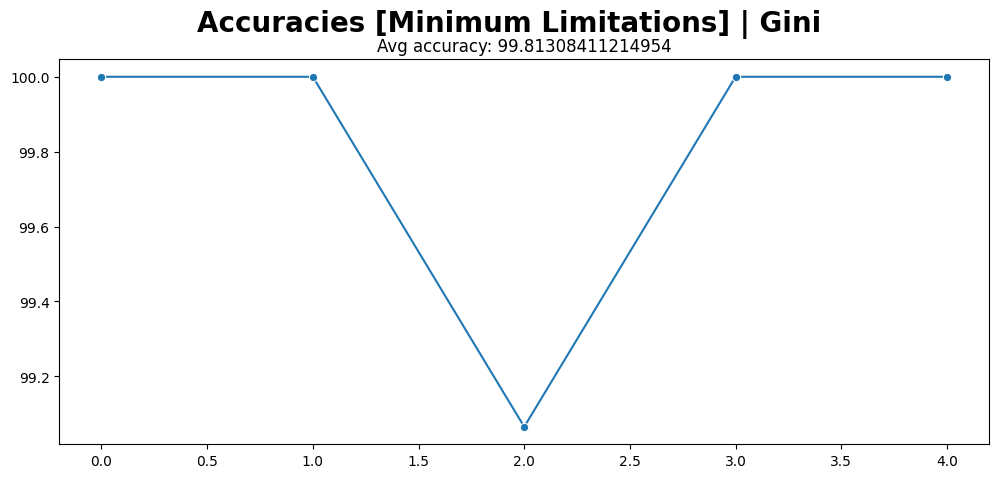

In [508]:
model = DecisionTreeClassifier(max_depth=float('inf'), min_sample_split=2, min_sample_leaf=1, features=None, mode='gini')
data = cross_validation(X, Y, model, k=5, prune=False, alpha=0.01)
avg_accuracy = np.mean(data['accuracies'])

plt.figure(figsize=(12, 5))
sns.lineplot(data['accuracies'], marker='o')
plt.suptitle('Accuracies [Minimum Limitations] | Gini')
plt.title(f'Avg accuracy: {avg_accuracy}')
plt.show()

In [509]:
model.print_tree()

 feature 3:  <= 2.0 | info_gain: 0.25076204764995225 | depth: 0
   leaf: class 1.0 | {1.0: 112} | depth: 1
   feature 3:  <= 3.0 | info_gain: 0.2511090867969217 | depth: 1
     leaf: class 2.0 | {2.0: 73} | depth: 2
     feature 3:  <= 4.0 | info_gain: 0.369597427400397 | depth: 2
       leaf: class 3.0 | {3.0: 137} | depth: 3
       feature 3:  <= 5.0 | info_gain: 0.4971520113919544 | depth: 3
         leaf: class 4.0 | {4.0: 57} | depth: 4
         leaf: class 5.0 | {5.0: 49} | depth: 4


(<Figure size 1200x800 with 10 Axes>, <Axes: >)

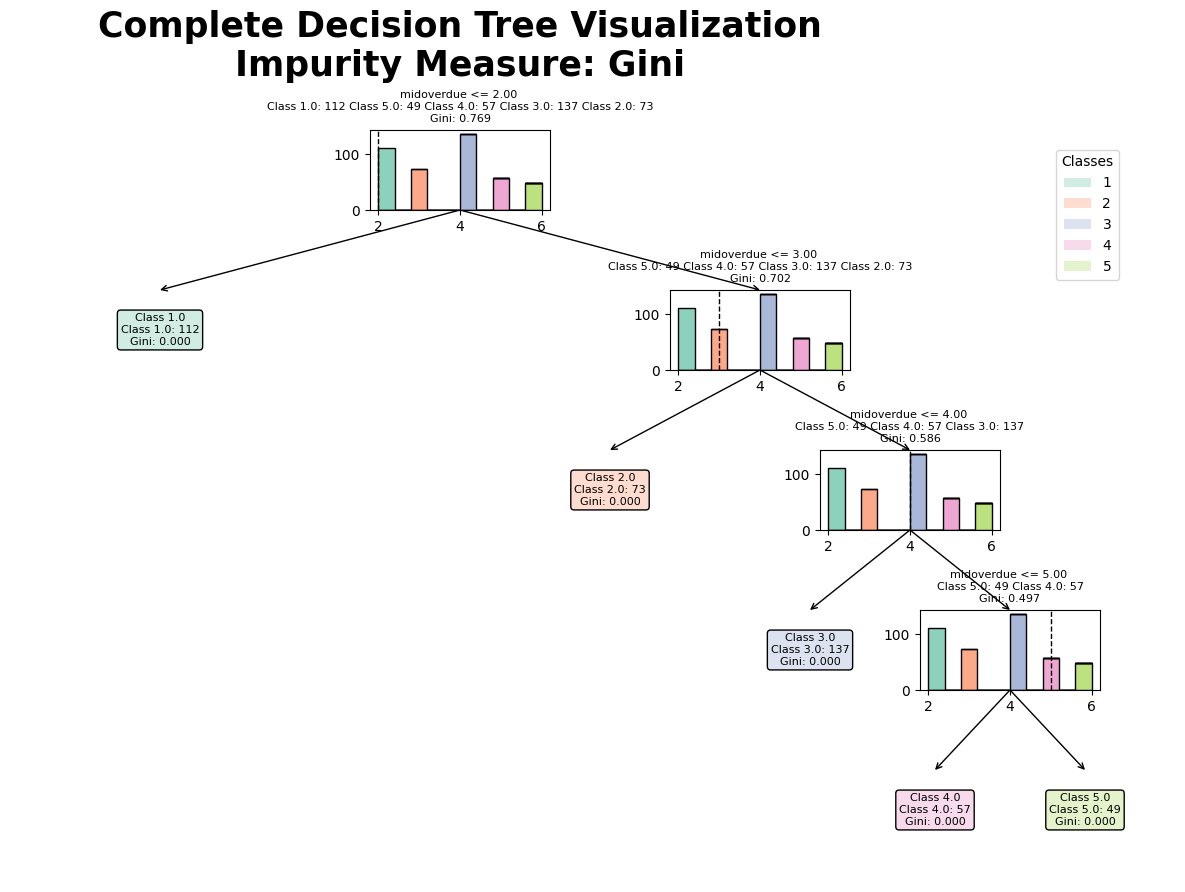

In [510]:
data_df = pd.DataFrame(data['X_train'], columns=feature_names)
data_df[target_col] = data['y_train'].flatten()

viz = TreeVisualization(model, data_df, target_col, feature_names)
viz.plot_prediction_path()

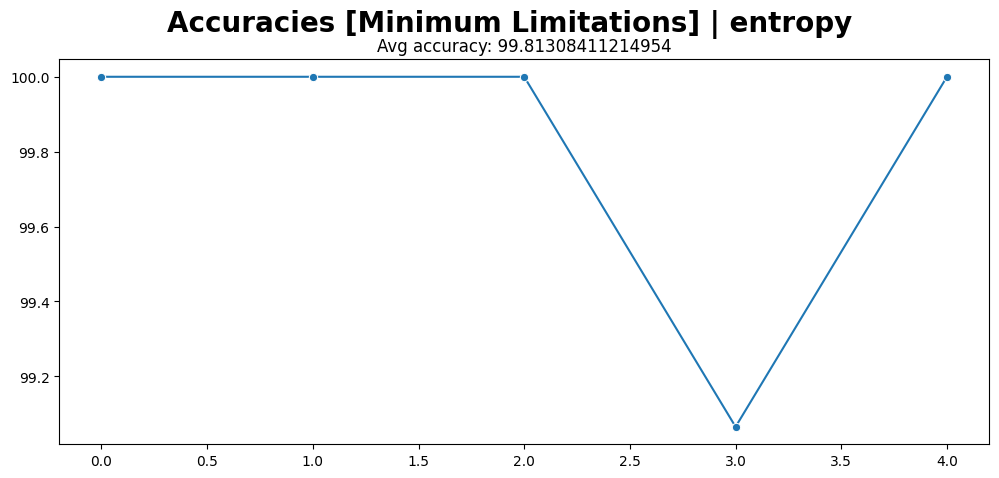

In [511]:
model = DecisionTreeClassifier(max_depth=float('inf'), min_sample_split=2, min_sample_leaf=1, features=None, mode='entropy')
data = cross_validation(X, Y, model, k=5, prune=False, alpha=0.01)
avg_accuracy = np.mean(data['accuracies'])

plt.figure(figsize=(12, 5))
sns.lineplot(data['accuracies'], marker='o')
plt.suptitle('Accuracies [Minimum Limitations] | entropy')
plt.title(f'Avg accuracy: {avg_accuracy}')
plt.show()

(<Figure size 1200x800 with 10 Axes>, <Axes: >)

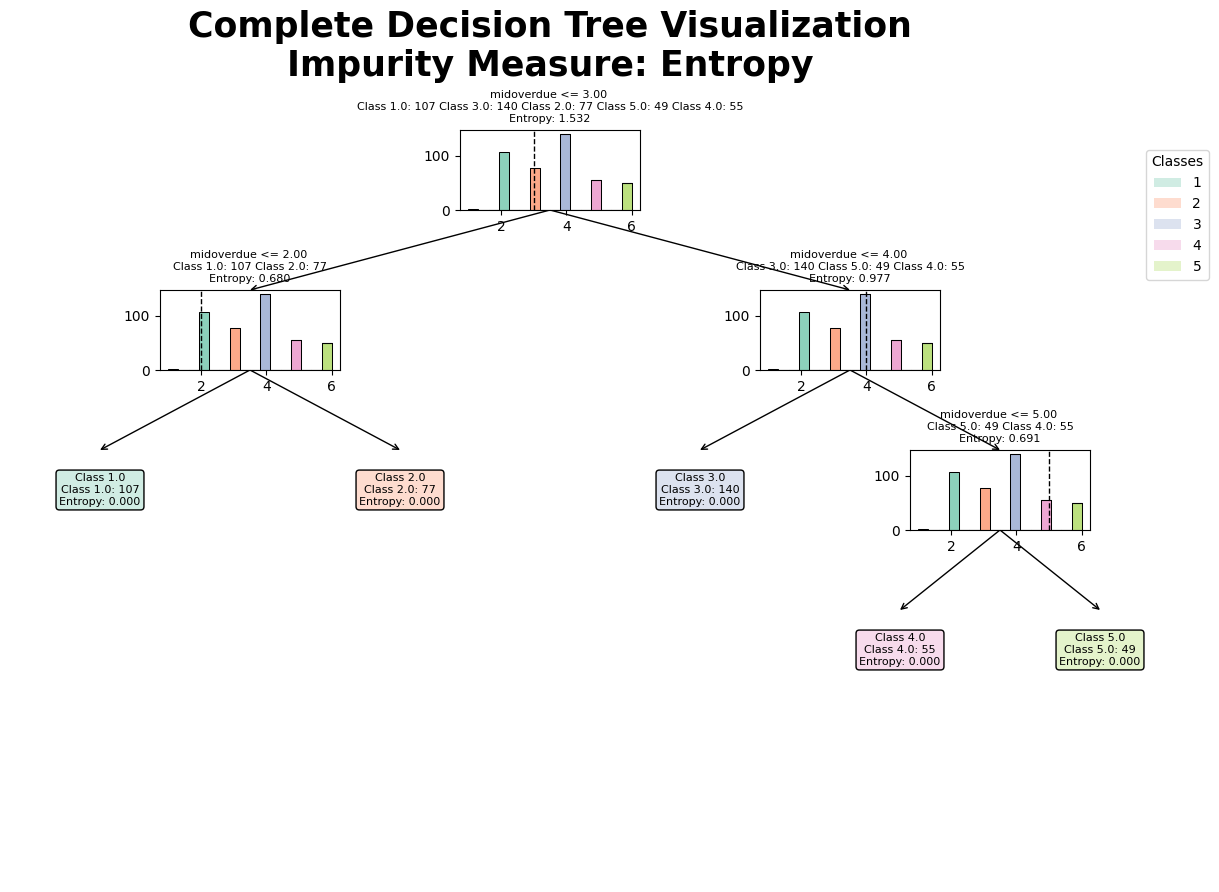

In [512]:
data_df = pd.DataFrame(data['X_train'], columns=feature_names)
data_df[target_col] = data['y_train'].flatten()

viz = TreeVisualization(model, data_df, target_col, feature_names)
viz.plot_prediction_path()

In [513]:
selected_cols = df_clean.columns.tolist()[:-1]

In [514]:
feature_importance = pd.DataFrame([selected_cols, model.feature_importance[0], model.feature_importance[1]]).T
feature_importance.columns = ['cols', 'info_gain', 'count']
feature_importance

,cols,info_gain,count
0,income,0.0,0.0
1,tenor,0.0,0.0
2,dependents,0.0,0.0
3,midoverdue,2.73679,4.0
4,age,0.0,0.0
5,empyear,0.0,0.0
6,asset,0.0,0.0
7,debt,0.0,0.0


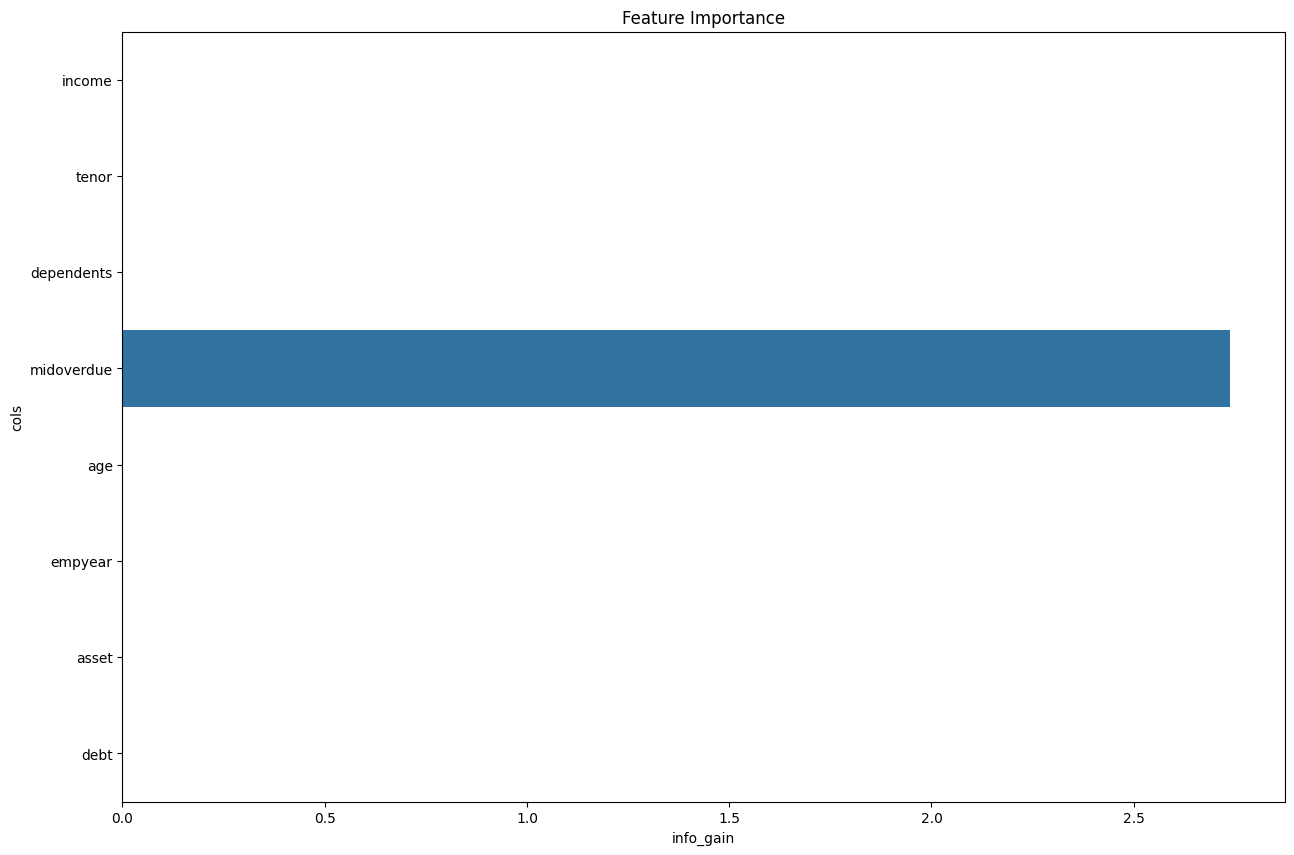

In [515]:
sns.barplot(feature_importance, x='info_gain', y='cols')
plt.title('Feature Importance')
plt.show()

- not surpriseing midoverdure dominating the calcm this is because it has perfect corr 
- No differences in gini and entropy because the characteristics of the risktaking in midoverdue is very good
- the imbalanced class is also not that extreme

## `Scenario 2`: Pre Pruning

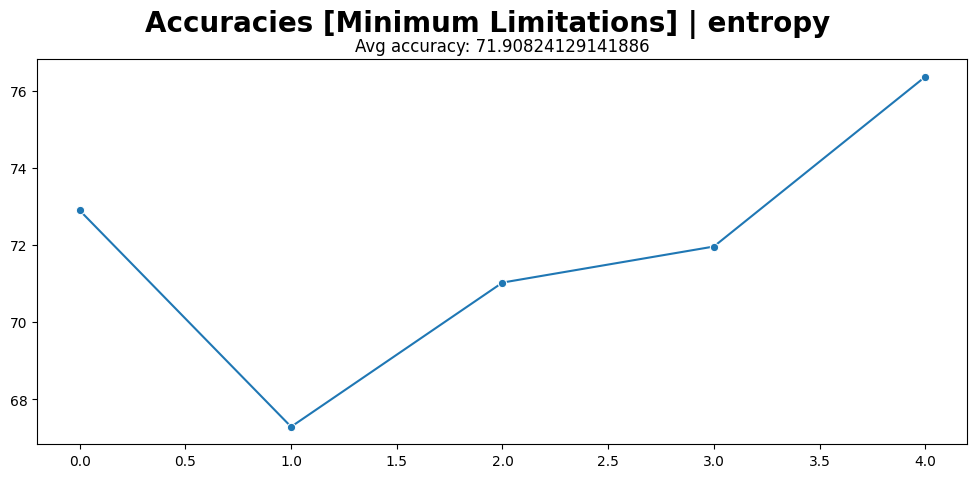

In [516]:
model = DecisionTreeClassifier(max_depth=5, min_sample_split=10, min_sample_leaf=3, features=[2, 6, 7], mode='entropy')
data = cross_validation(X, Y, model, k=5, prune=False)
avg_accuracy = np.mean(data['accuracies'])

plt.figure(figsize=(12, 5))
sns.lineplot(data['accuracies'], marker='o')
plt.suptitle('Accuracies [Minimum Limitations] | entropy')
plt.title(f'Avg accuracy: {avg_accuracy}')
plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_11256\3461647954.py:6: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


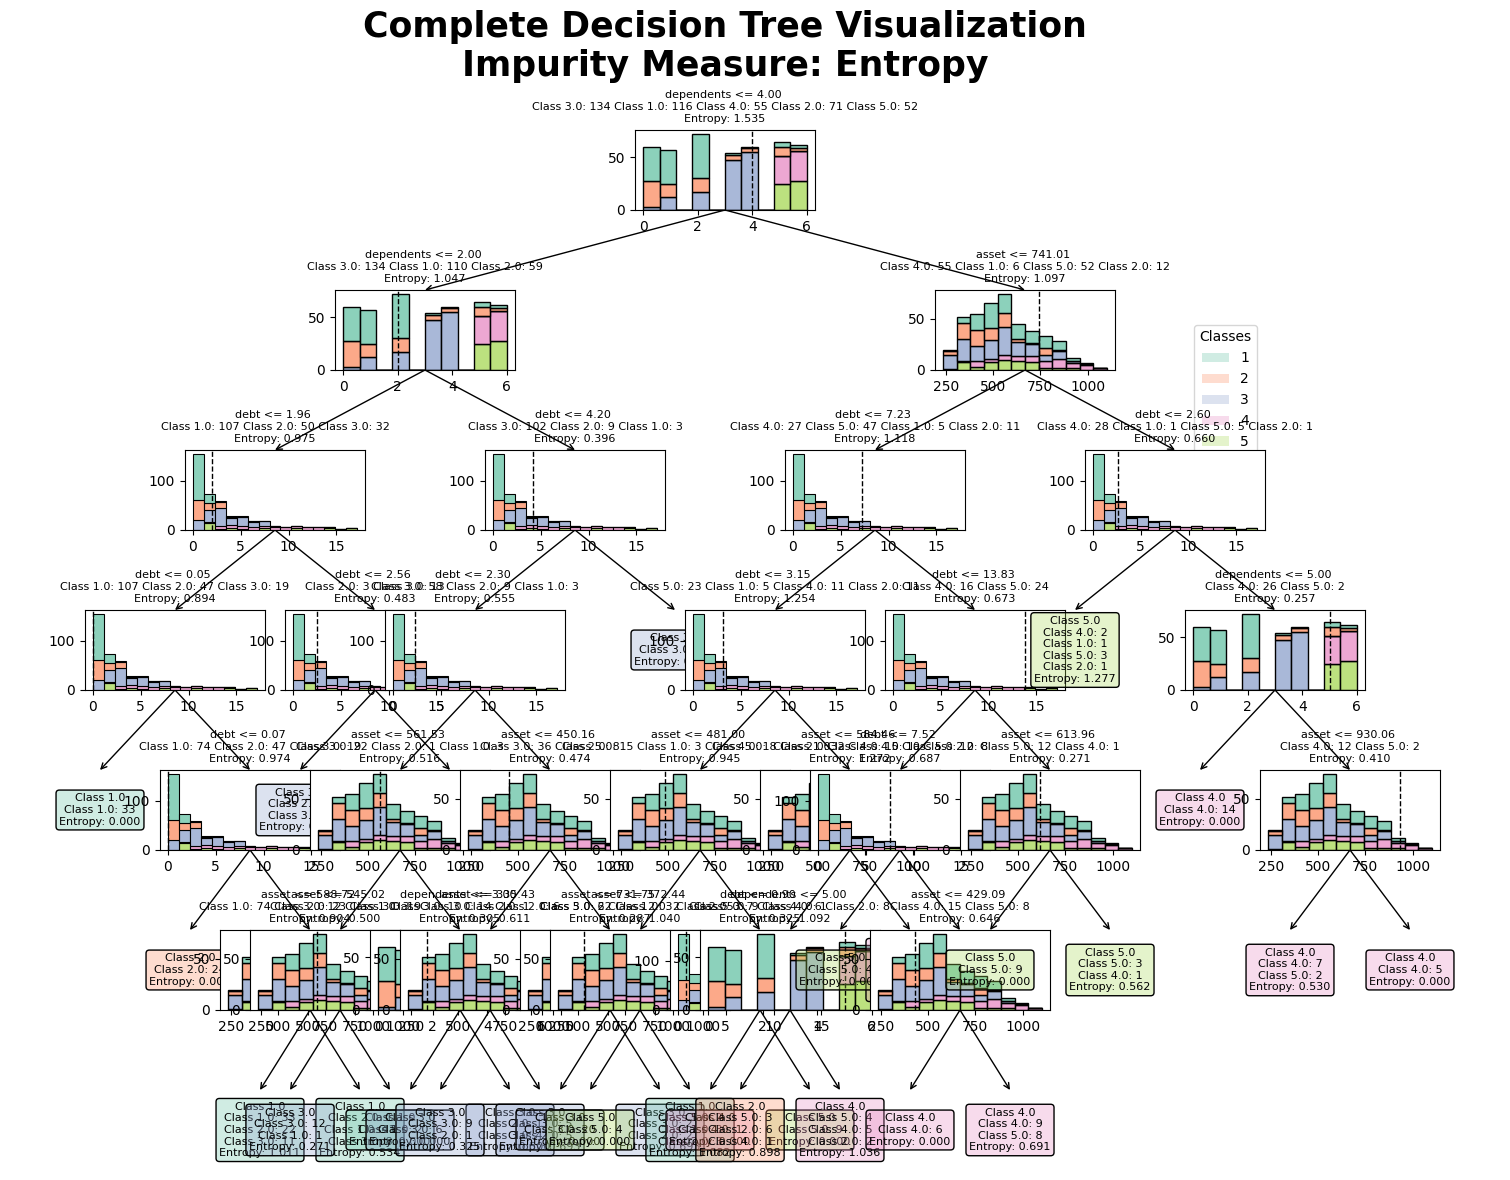

In [517]:
data_df = pd.DataFrame(data['X_train'], columns=feature_names)
data_df[target_col] = data['y_train'].flatten()

viz = TreeVisualization(model, data_df, target_col, feature_names)
viz.plot_prediction_path()
plt.tight_layout()

## `Scenario 3`: Cost Complexity Pruning

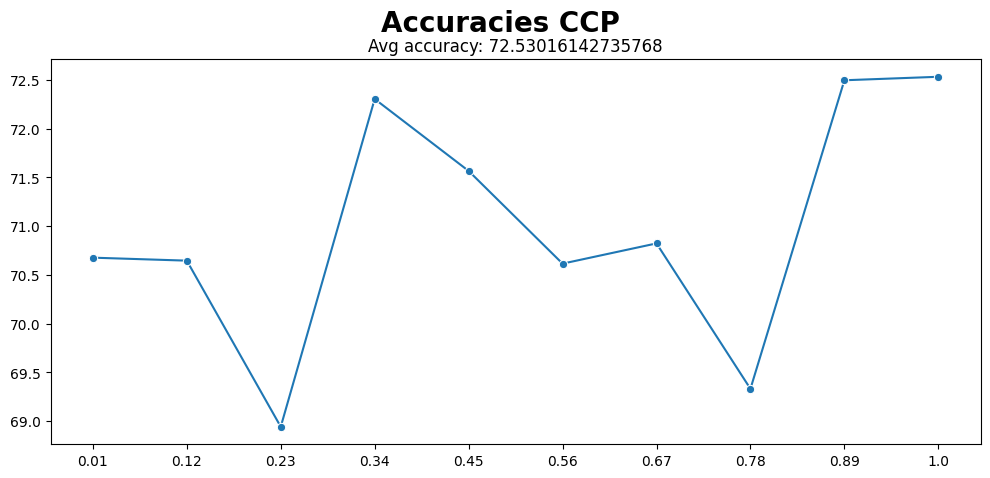

In [518]:
alphas = np.linspace(0.01, 1, 10)
accuracies = []
for alpha in alphas:
    model = DecisionTreeClassifier(max_depth=float('inf'), min_sample_split=10, min_sample_leaf=1, features=[2, 5, 7], mode='gini')
    data = cross_validation(X, Y, model, k=5, prune='CCP', alpha=alpha)
    avg_accuracy = np.mean(data['accuracies'])
    accuracies.append(avg_accuracy)
new_alphas = [round(x, 2) for x in alphas]
plt.figure(figsize=(12, 5))
sns.lineplot(accuracies, marker='o')
plt.suptitle('Accuracies CCP')
plt.xticks(range(0, 10, 1), new_alphas)
plt.title(f'Avg accuracy: {avg_accuracy}')
plt.show()

it didn't effect, meaning even we assign high alpha, CCP didn't cut the subtree because the feature (3) can really seperate the classes with low impurity cost`     

## Conclusion
1. Corr and mutual info gives high corr between target and midoverdue   
2. feature importance show that midoverdue used for all decisin nodes   
3. Pre pruning -> limiting split leaf depth and features really effect  
4. CCP dont really effect       
5.  REP IS NOT SUITABLE

In [519]:
def classification_report(y_pred, y_test):
    accuracy = np.mean(y_pred == y_test)
    report_data = []
    classes = np.unique(y_test)

    for cls in classes:
        # predicted as A is A
        TP = np.sum((y_pred == cls) & (y_test == cls))
        # predicted as A is actually B
        FP = np.sum((y_pred != cls) & (y_test == cls))
        # predicted as B is actually A
        FN = np.sum((y_pred == cls) & (y_test != cls))

        # ratio of the actual A out of the predicted A (ex: 80% is A, 20% is predicted as A but actually B)
        precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0 
        # ratio of the actual A among the correctly predicted as A
        recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0
        f1_score = 2 * (precision * recall) / (precision + recall)
        data = [cls, precision, recall, f1_score]
        report_data.append(data)
    
    report_df = pd.DataFrame(report_data, columns=['class', 'precision', 'recall', 'f1_score'])
    report_df.loc['Accuracy'] = ['-', '-', '-', accuracy]
    return report_df


In [520]:
model = DecisionTreeClassifier(max_depth=float('inf'), min_sample_split=2, min_sample_leaf=1, features=None, mode='gini')
data = cross_validation(X, Y, model, k=5, prune=False, alpha=0) 
actual_predict = pd.DataFrame([data['y_test'], data['y_pred']]).T
actual_predict.columns = ['y_test', 'y_pred']
report_df = classification_report(actual_predict['y_test'].values, actual_predict['y_pred'].values)
display(report_df)

,class,precision,recall,f1_score
0,1.0,1.0,1.0,1.0
1,2.0,1.0,1.0,1.0
2,3.0,1.0,1.0,1.0
3,4.0,1.0,1.0,1.0
4,5.0,1.0,1.0,1.0
Accuracy,-,-,-,1.0


perfect no missclassifications!

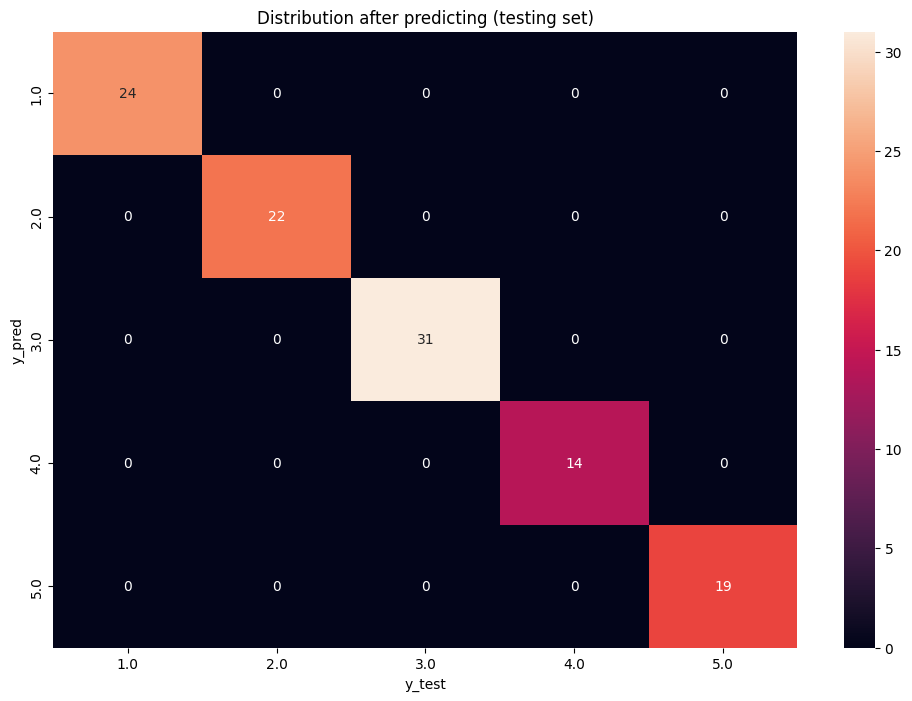

In [521]:
plt.figure(figsize=(12, 8))
sns.heatmap(pd.crosstab(actual_predict['y_test'].values, actual_predict['y_pred'].values), annot=True)
plt.ylabel('y_pred')
plt.xlabel('y_test')
plt.title('Distribution after predicting (testing set)')
plt.show()

In [522]:
for key, val in model.get_all_leaf_info().items():
    print(f'{key} node_id: {val}')

1 node_id: {1.0: 112}
5 node_id: {2.0: 73}
13 node_id: {3.0: 143}
29 node_id: {4.0: 58}
30 node_id: {5.0: 42}


## End Product GUI

Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\tkinter\__init__.py", line 1967, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\Acer\AppData\Local\Temp\ipykernel_11256\4116716998.py", line 98, in predict_and_plot
    new_instance = [int(x) for x in new_input]
                    ^^^^^^
ValueError: invalid literal for int() with base 10: ''


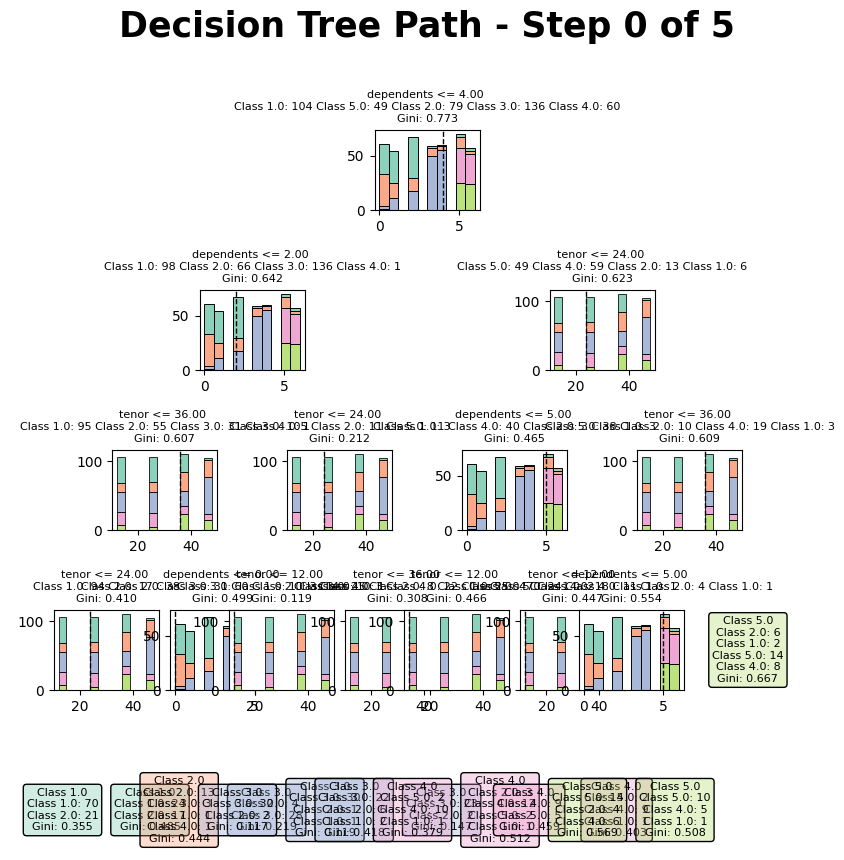

In [559]:
from tkinter.ttk import *
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
class TkinterApp:
    def __init__(self, root):
        self.root = root    
        self.root.attributes('-fullscreen', True)
        self.root.title("Risk Rating Prediction App")
        
        self.tab_control = Notebook(root)
        self.predict_tab = Frame(self.tab_control, padding="30")
        self.history_tab = Frame(self.tab_control, padding="30")
        self.setting_tab = Frame(self.tab_control, padding="30")

        style = Style()
        style.configure('TNotebook.Tab', font=('Poppins', 18), padding="30 10 30 10")
        style.configure('Label.Text', font=('Poppins', 14))
        style.configure('Text.Input', font=('Poppins', 15)) 
        style.configure('Label.Description', font=('Poppins light', 15))
        
        self.tab_control.add(self.predict_tab, text="Predict")
        self.tab_control.add(self.history_tab, text="History")
        self.tab_control.add(self.setting_tab, text="Setting")
        self.tab_control.pack(anchor='w', fill='x')

        self.init_predict_tab()
        self.init_history_tab()
        self.init_setting_tab()

    def input_label(self,parent, label, value=None, textvariable=None, type='entry', help_text=None,  col=None, row=None):
        var = tk.StringVar(value=textvariable)
        Label(parent,text=label, font=('Poppins light', 16)).grid(column=col, row=row, sticky='w')
        if type == "entry":
            widget = Entry(parent, textvariable=var,  font=('Poppins light', 17))
        else:
            widget = Combobox(parent, textvariable=var, value=value, font=('Poppins light', 17))
        
        widget.grid(column=col, row=row+1, sticky='w')
        if help_text:
            Label(parent,text=help_text, font=('Poppins italic', 10)).grid(column=col, row=row+2, sticky='w')
        return widget
    
    def init_predict_tab(self):
        Label(self.predict_tab, text="BI Checking App with Decision Tree Algorithm", font=('Poppins medium', 25)).grid(column=0, row=0, sticky='w')
        Label(self.predict_tab, text="Give consideration if this type of client suit to give credit or not", font=('Poppins light', 15)).grid(column=0, row=1, sticky='w')

        frame_input = Frame(self.predict_tab)
        frame_input.grid(column=1, row=2, sticky='w', )
        # contractcode	income	tenor	dependents	midoverdue	riskrating	age	empyear	asset	debt
        self.client_name_entry = self.input_label(frame_input, "Client Name",  help_text="insert the name so easy to search", col=0, row=0) 
        self.tenor_entry = self.input_label(frame_input, "Tenor",  help_text="insert the name so easy to search", col=1, row=0)
        self.incomes_entry = self.input_label(frame_input, "Income",  help_text="insert the name so easy to search", col=2, row=0)
        self.midoverdue_entry = self.input_label(frame_input, "Midoverdue",  help_text="insert the name so easy to search", col=3, row=0)

        self.age_entry = self.input_label(frame_input, "Age",  help_text="insert the name so easy to search", col=0, row=3)
        self.empyear_entry = self.input_label(frame_input, "Employe Year",  help_text="insert the name so easy to search", col=1, row=3)
        self.asset_entry = self.input_label(frame_input, "Total Asset",  help_text="insert the name so easy to search", col=2, row=3)
        self.debt_entry = self.input_label(frame_input, "Total Debt",  help_text="insert the name so easy to search", col=3, row=3) 

        Button(frame_input, text="Go Predict", command=self.predict_and_plot, padding="30 10 30 10" ).grid(column=0, row=6, sticky='w')
        
        self.frame_viz = Frame(self.predict_tab)
        self.frame_viz.grid(column=0, row=2, pady=(30, 0), sticky='w')

        self.step = tk.Scale(self.frame_viz, from_=0, to=10, orient='horizontal', command=self.update_plot, length=500, tickinterval=1)
        self.step.grid(column=0, row=0)

        self.fig, self.ax =  plt.subplots(figsize=(7,8))
        self.canvas = FigureCanvasTkAgg(self.fig, self.frame_viz)
        self.canvas.draw()
        self.canvas.get_tk_widget().grid(column=0, row=1, sticky='w')

        self.frame_result = Frame(frame_input)
        self.frame_result.grid(column=1, row=8)
        Label(self.frame_result, text="Prediction Result", font=('Poppins medium', 15)).grid(column=0, row=0, sticky='w')

    def update_plot(self):
        self.fig.clf()
        self.ax = self.fig.add.subplot(111)
        prediction, decisions = self.viz.get_prediction_path()
        max_step = len(decisions)
        current = int(self.step.get())
        if current > max_step:
            self.step.config(max_step)
        self.viz.plot_prediction_path(x=self.new_instance, step=self.step, fig=self.fig, ax=self.ax)

    def predict_and_plot(self):
        self.fig.clf()
        new_input = [
            self.incomes_entry.get(),
            self.tenor_entry.get(),
            self.midoverdue_entry.get(),
            self.age_entry.get(),
            self.empyear_entry.get(),
            self.asset_entry.get(),
            self.debt_entry.get()
        ]
        new_instance = [int(x) for x in new_input]
        
        # self.features = [int(x) for x in list(self.features_entry.get().split(', '))]

        features = [int(x) for x in list(self.features_entry.get().split(', '))]
        self.model = DecisionTreeClassifier(
            max_depth=int(self.max_depth_entry.get()), 
            min_sample_split=int(self.min_sample_split_entry.get()), 
            min_sample_leaf=int(self.min_sample_leaf_entry.get()), 
            features=features, 
            mode=self.mode_entry.get()
        )
        
        feature_names = ['income', 'tenor', 'dependents', 'midoverdue',  'age', 'empyear', 'asset', 'debt']
        target_col = 'riskrating'

        X = df_clean[feature_names].values
        Y = df_clean[target_col].values

        data = cross_validation(X, Y, self.model, k=5, prune=False, alpha=0.1)
        data_df = pd.DataFrame(data['X_train'], columns=feature_names)
        data_df[target_col] = data['y_train'].flatten()

        self.viz = TreeVisualization(tree=self.model, data_df=data_df, target_col=target_col, feature_names=feature_names)
        self.viz.plot_prediction_path(x=new_instance, step=self.step.get(), fig=self.fig, ax=self.ax)
        
        predict = self.model.make_predictions(new_instance, self.model.root)
        count = self.model.get_leaf_info(new_instance, self.model.root)[1]
        ratio = {k: round(v / sum(count.values()), 2) for k, v in count.items()}

        new_row = {
            'predict': [predict],
            'ratio': [ratio],
            'client_name': [self.client_name_entry.get()],
            'income': [self.incomes_entry.get()],
            'tenor': [self.tenor_entry.get()],
            'midoverdue': [self.midoverdue_entry.get()],
            'age': [self.age_entry.get()],
            'employment_years': [self.empyear_entry.get()],
            'asset': [self.asset_entry.get()],
            'debt': [self.debt_entry.get()],
            'max_depth': [self.max_depth_entry.get()],
            'min_sample_split': [self.min_sample_split_entry.get()],
            'min_sample_leaf': [self.min_sample_leaf_entry.get()],
            'features': [self.features_entry.get()],
            'mode': [self.mode_entry.get()],
        }
        col = 0
        row = 1
        for column, value in new_row.items():
            label_name = column.replace("_"," ").title()
            value_label = value[0]
            Label(self.frame_result, text=label_name, font=('Poppins light', 10)).grid(column=col, row=row, sticky='w')
            Label(self.frame_result, text=value_label, font=('Poppins medium', 20)).grid(column=col, row=row+1, sticky='w')
            col+=1
            if col == 2:
                col=0
                row+=2

    def init_history_tab(self):
        Label(self.history_tab, text="Check History Prediction", font=('Poppins medium', 25)).grid(column=0, row=0, sticky='w')
        Label(self.history_tab, text="and compare the performance", font=('Poppins light', 15)).grid(column=0, row=1, sticky='w')

    def init_setting_tab(self):
        Label(self.setting_tab, text="Adjust your best Model", font=('Poppins medium', 25)).grid(column=0, row=0, sticky='w')
        Label(self.setting_tab, text="Make your best model based on your need ", font=('Poppins light', 15)).grid(column=0, row=1, sticky='w')

        frame_input = Frame(self.setting_tab)
        frame_input.grid(column=0, row=3, sticky='n')

        self.max_depth_entry = self.input_label(frame_input, "Max Depth", textvariable=3 ,  help_text="insert the name so easy to search", col=0, row=0) 
        self.min_sample_split_entry = self.input_label(frame_input, "Min Sample Split",textvariable=2,  help_text="insert the name so easy to search", col=1, row=0)
        self.min_sample_leaf_entry = self.input_label(frame_input, "Min Sample Leaf",textvariable=1,  help_text="insert the name so easy to search", col=2, row=0)
        
        self.features_entry = self.input_label(frame_input, "Feature Selection", textvariable=['2', '3', '4'], help_text="insert the name so easy to search", col=0, row=3)
        self.mode_entry = self.input_label(frame_input, "Mode Impurity", type='checkbox',textvariable='gini', value=['gini', 'entropy' ],  help_text="insert the name so easy to search", col=1, row=3)
        self.post_pruning_entry = self.input_label(frame_input, "Post Pruning  ", type='checkbox',textvariable=False, value=['CCP', 'REP', False],  help_text="insert the name so easy to search", col=2, row=3)
        self.alpha_entry = self.input_label(frame_input, "Alpha Value",textvariable=1,  help_text="insert the name so easy to search", col=3, row=3)

        Button(frame_input, text="Update Train", command=self.predict_and_plot, padding="30 10 30 10" ).grid(column=0, row=6, sticky='w')

if __name__ == "__main__":
    root = tk.Tk()
    app = TkinterApp(root)
    root.mainloop()
